# IPCV Project - Jigsaw Puzzle

## Abstract
~~This project aims at creating an algorithm capable of matching puzzle pieces' sides, using OpenCV to analyze pictures taken in on a controlled setup environment with replicable hardware, light conditions, camera settings and parameters.~~

~~The use case scenario within which this project has been developed, is a Puzzle of a thousand (1007) pieces, mostly made up of same coloured dark pieces (forming a night view ladscape of Italian mountains), where informations about patterns and colours are practically useless; the only useful information about the pieces are their overall shape (rectangularity or eccentricity), and the complex shapes of their edges and _knobs and holes_ (male and female junctions).~~

This project aims at developing an algorithm capable of matching the sides of puzzle pieces by utilizing **OpenCV** to analyze images captured in a controlled environment. The setup ensures replicable conditions in terms of hardware, lighting, camera settings, and parameters.

The project has been developed for a use-case scenario involving a 1007-piece puzzle, mainly composed of dark, similarly colored pieces depicting a nighttime landscape of the Italian mountains. In this context, information related to patterns and colors proves to be practically ineffective. Consequently, the only valuable features for distinguishing the pieces are their overall shape, such as rectangularity or eccentricity and the intricate contours of their edges, including the knobs and holes (male and female connectors).

## Scenario
The project has been developed for a use-case scenario involving a 1007-piece puzzle, mainly composed of dark, similarly colored pieces depicting a nighttime landscape of the Italian mountains.
#todo aggiungere link al puzzle e qualche foto

## Implementation




## Code Documentation
The code is documented using DocString. Each function includes a detailed **Docstring** that explains its purpose, parameters, return values, and usage examples. This approach improves code readability and enhances development within _IDEs_ by providing quick access to documentation through tooltips (`shift+tab` over a function) and the `help()` function.


# DataBase aquisition


#todo add image or CAD of the hardware setup


#todo add iPhone camera specs

#todo explai

# Pre-processing
Every image in the database is pre-processed to crop it at a similiar size and check for errors in alignment and scale.
This part of the process is done in batch, and executed in a separate script.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import re

## Database Structure and Organization
Here we define the structure of the database and inner folders, from which images will be loaded and saved for further use.
Here is a visual representation of the database structure:


In [2]:
baseFolder = ""
databaseFolder = os.path.join(baseFolder, "IPCV_Jiggs_DB/DB_V01/")
basePhotoFolder = os.path.join(databaseFolder, "1_basephoto/")
croppedFolder = os.path.join(databaseFolder, "2_cropped/")
thresholdedFolder = os.path.join(databaseFolder, "3_thresholded/")
cannyesFolder = os.path.join(databaseFolder, "4_cannyed/")

print(croppedFolder)

IPCV_Jiggs_DB/DB_V01/2_cropped/


selecting values and flags
for functions

In [3]:
threshold_value = 70  # Valore di soglia

flag_showAllContours = True
contourPeriLenThreshold = 150

circlesRadius = 20
circlesThickness = 5
contoursThickness = 3

lineApproxThickness = 3


## Helper Functions definition
The following functions are syntactic sugar helper functions, used to _DRY_ the code along the way, as we need to show and load many images.

In [4]:
# Visualizing images on subplots, helper function
def show_image(title, image, pos, s1 = 2, s2 = 2, cmap='gray'):
    plt.subplot(s1, s2, pos)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image, cmap=cmap)

# Visualizing histogram on subplots, helper function
def show_histogram(title, image, pos, s1 = 2, s2 = 2, logY = False):
    plt.subplot(s1, s2, pos)
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue')
    # vertical red dotted line for threshold
    if threshold_value is not None:
        plt.axvline(x=threshold_value, color='red', linestyle='--', linewidth=1.5, label=f'Threshold ({threshold_value})')
        plt.legend()
    # optional log scale, linear if omitted
    if logY:
        plt.yscale('log', base=10)

def tryLoadingImage(_pieceNumber, cropped_folder = croppedFolder):
    """
    Attempts to load an image corresponding to a puzzle piece from a specified folder.

    The function constructs a filename based on the given piece number and a predefined
    naming convention, then searches recursively in the provided cropped_folder for an image file.
    The image is loaded in grayscale mode using OpenCV if a match is found.

    Parameters:
    -----------
    _pieceNumber : int or str
        The identifier for the puzzle piece. This value will be zero-padded to 3 digits
        to match the naming convention (e.g., '001', '002', ...).
    cropped_folder : str, optional
        The path to the folder where the cropped images are stored.
        Default is the value of the variable 'croppedFolder'.

    Returns:
    --------
    img : numpy.ndarray or None
        The loaded grayscale image as a numpy array if found, or None if no matching image is found.
    """
    image_name_base = "Jigg_piece"
    image_version = "_V01"
    crop_level = "_crop65"
    image_extention_list = [".jpeg", ".jpg", ".png"]

    # zero padding the format (3 digits)
    piece_number_str = f"{int(_pieceNumber):03d}"

    # Creating a regex pattern to find the correct image, using the pattern definition chosen for the Database
    # pattern = re.compile(f"{image_name_base}{piece_number_str}{image_version}{crop_level}\\.(jpeg|jpg|png)$", re.IGNORECASE)
    # pattern = re.compile(f"{image_name_base}{piece_number_str}(?:_V.*)?(?:_crop.*)?\\.(jpeg|jpg|png)$", re.IGNORECASE)
    pattern = re.compile(f"{image_name_base}{piece_number_str}_.*\\.(jpeg|jpg|png)$", re.IGNORECASE)


    # Looking for the image and returning it 
    print("Outside")
    for root, _, files in os.walk(cropped_folder):
        print("Entered")
        for file in files:
            if pattern.match(file):
                image_path = os.path.join(root, file)
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    print(f"\nLoaded image {piece_number_str} from (relative) path: {image_path}")
                    return img

    print(f"Image non found at {image_path}")
    return None



# Single Image analysis
In the first part of the project we will try different solutions and algorithms to retrieve the shape (its edges) of a randomly chosen image, to then construct a database for all puzzle pieces to compare and match.

In [5]:
# complete image name example: "Jigg_piece002_V01" or "Jigg_piece002_D" 

piece_number = 81 # from 1 to 999, could not exists

In [6]:
image = tryLoadingImage(piece_number)

imageShape = image.shape
# imageNumberTitle = f"Image #{piece_number}{image_version} {imageShape}"
imageNumberTitle = f"Image #{piece_number} {imageShape}"
print(imageNumberTitle)

Outside
Entered

Loaded image 081 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece081_crop.jpg
Image #81 (1606, 1606)


### Histogram and Thresholding
We then analyze the histogram of the grayscaled image, on both linear and log scale, to check where to separate the light and dark part of the image using the binary threshold. 

Binary image thresholding is used to separate objects from the background, converting a grayscale image into a binary image, where each pixel is assigned either a black (0) or white (255) value based on a specified threshold. This simplification makes it easier to perform object detection, contour extraction and shape analysis.

The threshold value was chosen to be approximately **70** as it is sufficiently distant from both the light and dark Gaussian peaks present in the selected database, ensuring a clear separation between the puzzle pieces and the background.

The threshold is applied as _inverted_, because the puzzle pieces in the images are black, but for subsequent processing steps (such as contour detection), it is necessary for the pieces to appear white against a black background.

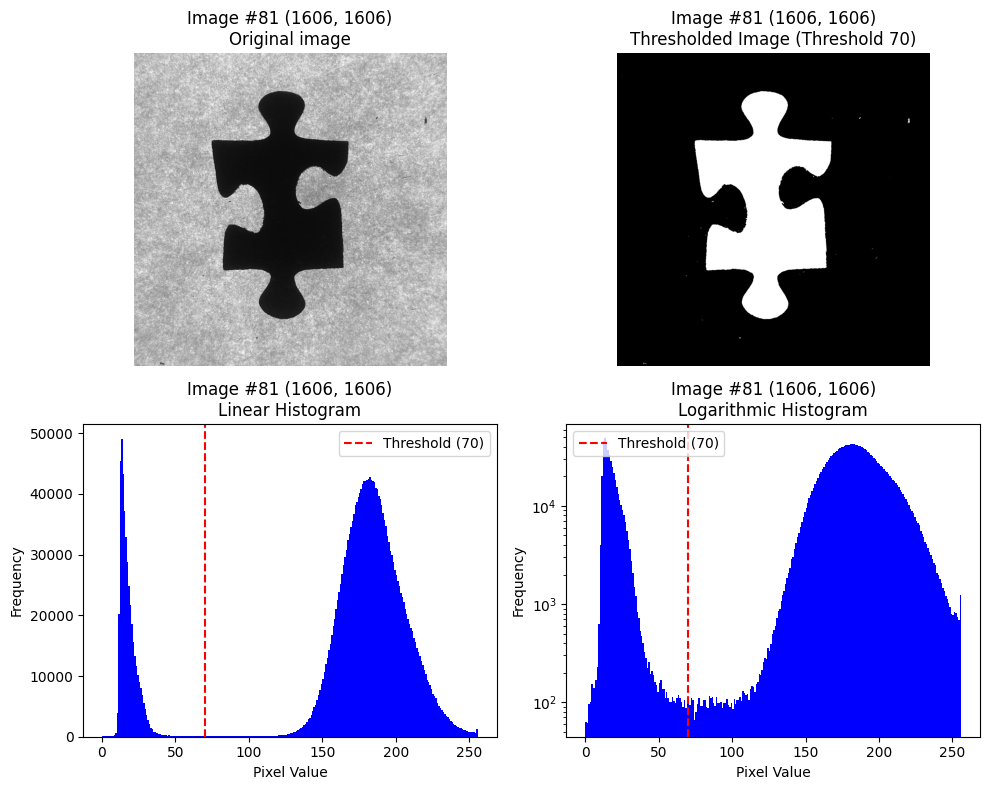

In [7]:
plt.figure(figsize=(10, 8))

# Original Image
show_image(f"{imageNumberTitle}\nOriginal image", image, 1)

# Binary Thresholding
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY_INV)
show_image(f"{imageNumberTitle}\nThresholded Image (Threshold {threshold_value})", thresholded_image, 2)

# Linear and Logarithmic histograms 
show_histogram(f"{imageNumberTitle}\nLinear Histogram",image, 3)
show_histogram(f"{imageNumberTitle}\nLogarithmic Histogram", image, 4, logY = True)

plt.tight_layout()
plt.show()

## Erosion and Dilation (_Closing_)
We perform two morphological operations to delete little chunks of pixels that are external to our main area of interest, starting from the thresholded image, to get a more polished version of the thresholded image to work with.

We choose a big dimension, around 20 pixels, for the square kernel matrix, as with some trial and error we checked the dimension of the debris we want to delete, that sometimes appear huge. The performed operations are shown in overlay from the previous stage starting from the thresholded image, to check whether we accomplished our goal.

#todo correct image black difference as it is not totally correct

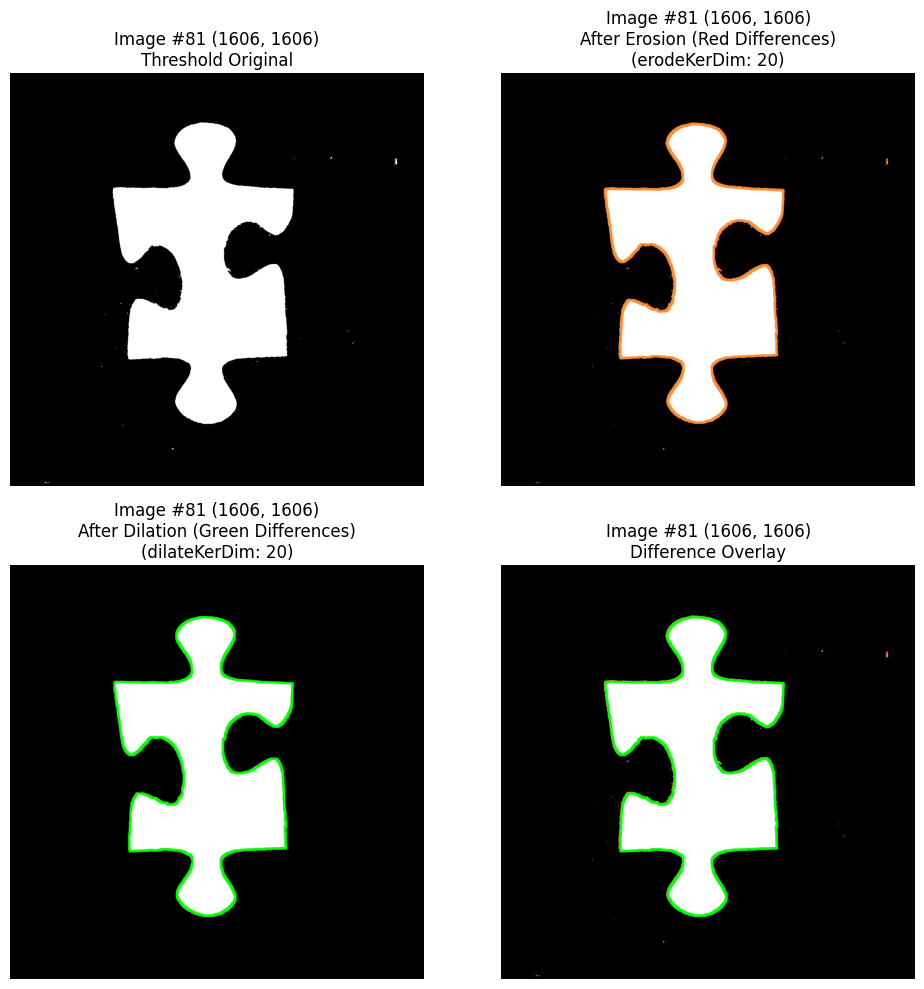

In [8]:
# defining the dimension of the kernel matrix (square) and the iterations of the performed operations
dimMatrixKernel = 20
opsIterations = 1

# defining red-ish and green-ish colors to represent erosion and dilation
erosion_color = [255, 140, 50]
dilation_color = [0, 255, 0]

plt.figure(figsize=(10, 10))


# creating a square kernel to use as a mask to perform these operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (dimMatrixKernel, dimMatrixKernel))

# Erosion
eroded_image = cv2.erode(thresholded_image, kernel, iterations=opsIterations)
diff_eroded = cv2.absdiff(thresholded_image, eroded_image)

# Dilation is performed after Erosion (!!)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=opsIterations)
diff_dilated = cv2.absdiff(eroded_image, dilated_image)

# Creating overlay for erosion and dilation
overlay_eroded = cv2.cvtColor(eroded_image, cv2.COLOR_GRAY2BGR)
overlay_eroded[diff_eroded > 0] = erosion_color 
overlay_dilated = cv2.cvtColor(dilated_image, cv2.COLOR_GRAY2BGR)
overlay_dilated[diff_dilated > 0] = dilation_color

# Overlaying the differences
overlay_image = cv2.cvtColor(thresholded_image, cv2.COLOR_GRAY2BGR)
overlay_image[diff_eroded > 0] = erosion_color
overlay_image[diff_dilated > 0] = dilation_color

# Showing original thresholded image
show_image(f"{imageNumberTitle}\nThreshold Original", thresholded_image, 1)
# Showing difference in red for eroded pixels
show_image(f"{imageNumberTitle}\nAfter Erosion (Red Differences)\n(erodeKerDim: {dimMatrixKernel})", overlay_eroded, 2, cmap=None)
# Showing difference in green for dilated pixels
show_image(f"{imageNumberTitle}\nAfter Dilation (Green Differences)\n(dilateKerDim: {dimMatrixKernel})", overlay_dilated, 3, cmap=None)
# Showing the overlay of Erosion and dilation on thresholded image
show_image(f"{imageNumberTitle}\nDifference Overlay", overlay_image, 4, cmap=None)

plt.tight_layout()
plt.show()



## Edge Detection and Contours approximations via polygonal line
We then perform edge detection using Canny's algorithm, using the enhanced version of the thresholded image.

Contour(s) found for Image #81 (1606, 1606): 1
Index: 0,	Perimeter: 9483,	Points: 68


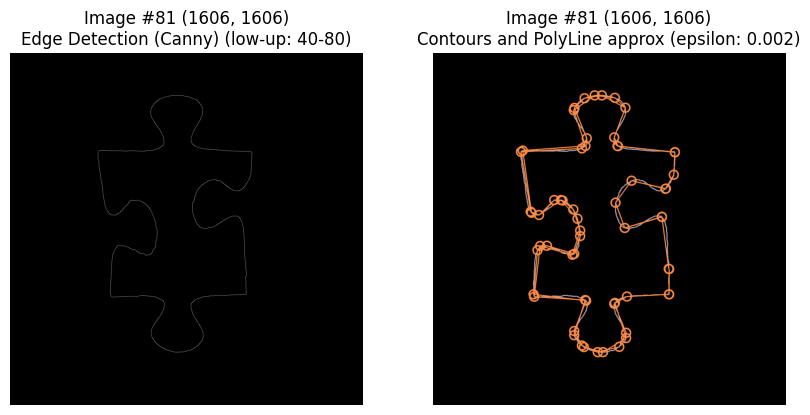

In [9]:
# Edge detection thresholds (40-80 works very well)
lower_threshold = 40
upper_threshold = 80

# epsilon value for approximating the polyline as defined in the algorithm
approxValueEps = 0.002

plt.figure(figsize=(10, 10))


# Edge detection using Canny
# cannyed_image = cv2.Canny(thresholded_image, lower_threshold, upper_threshold)
# cannyed_image = cv2.Canny(eroded_image, lower_threshold, upper_threshold)
cannyed_image = cv2.Canny(dilated_image, lower_threshold, upper_threshold)

# Finding the contour(s)
# contours, _ = cv2.findContours(cannyed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours, _ = cv2.findContours(cannyed_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
# contours, _ = cv2.findContours(cannyed_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)
contours, _ = cv2.findContours(cannyed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)

# Disegna i contorni sull'immagine originale
# contoured_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
contoured_image = cv2.cvtColor(cannyed_image, cv2.COLOR_GRAY2BGR)
# cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)

# Looking for four (4) corners
print(f"Contour(s) found for {imageNumberTitle}: {len(contours)}")
for indCon, contour in enumerate(contours):

    peri = cv2.arcLength(contour, True)
    # print("Perimeter: " + str(round(peri)))

    if(flag_showAllContours or peri > contourPeriLenThreshold):
        # colContour = (255, 255 / len(contours) * indCon, 0)
        colContour = (random.randint(100, 255), random.randint(100, 255), random.randint(100, 255))
        colLineApprox = (255,140,70)
        cv2.drawContours(contoured_image, contours, indCon, colContour, contoursThickness)

        approx = cv2.approxPolyDP(contour, approxValueEps * peri, True)
        print(f"Index: {indCon},\tPerimeter: {round(peri)},\tPoints: {len(approx)}")
        # if len(approx) == 4:
        for idP, point in enumerate(approx):
            # print(point)
            x, y = point[0]
            if( idP < len(approx) - 1 ):
                cv2.line(contoured_image, approx[idP][0], approx[idP+1][0], colLineApprox, lineApproxThickness)
            else:
                cv2.line(contoured_image, approx[idP][0], approx[0][0], colLineApprox, lineApproxThickness)
            cv2.circle(contoured_image, (x, y), circlesRadius, colLineApprox, circlesThickness)  # Disegna i corner in rosso


# Showing Canny's edge detection output
show_image(f"{imageNumberTitle}\nEdge Detection (Canny) (low-up: {lower_threshold}-{upper_threshold})", cannyed_image, 1, 1, 2)

# Showing the Polyline approximated curve above Canny
show_image(f"{imageNumberTitle}\nContours and PolyLine approx (epsilon: {approxValueEps})", contoured_image, 2, 1, 2)

# Saving the Cannyed image
# cv2.imwrite(f"{imageNumberTitle}_cannyed.png", cannyed_image)


# Corners Detection
The idea moving forward is to isolate the four edges and extract useful informations to create a database from which we should be able to find matching edges of adjacent pieces.
We would like the split these edges, creating a four different shapes that extends from one corner to the other. To do that we firstly need to detect the position of these four corners.
To find these four corners we are going to use two different corner detectors already implemented in OpenCV, and test them to check which one is suitable and then check their performance, these are:
- Harris Corner Detector
- Shi-Tomasi Corner Detector

### Harris Corner Detector
This detector uses #todo describe

blockSize = 22,   kSize = 31   k = 0.02    yelds good results for Harris (image 020)

### Shi-Tomasi Corner Detector
This detector uses #todo describe

blockSize = 22,   cornersQuality = 0.35   cornersMinDist = 300     yelds good results for GFTT (image 159)

Plotting green dots for the first 4 corners detected with cv2.goodFeaturesToTrack(), and other red dots for some other corners detected with less stronger features.

In [10]:
# sorting corners in a clockwise direction, starting from the top left; returns a list of sorted corners
# this function assumes first input having a structure like the one given as output of cv2.goodFeaturesToTrack()
def sortCornersCWTL(cornersToSort, CWdir = True, firstCornerFromTLinCWdir = 0):
    """
    Sorts the given corners in a clockwise direction, starting from the top-left corner.
    
    Parameters:
    cornersToSort (list of tuples): List of corners to sort, typically output from cv2.goodFeaturesToTrack().
    CWdir (bool, optional): If True, sorts corners in a clockwise direction. Default is True.
    firstCornerFromTLinCWdir (int, optional): Index of the first corner from the top-left in clockwise order. Default is 0.
    
    Returns:
    list of tuples: Sorted list of corners in clockwise order starting from the top-left corner.
    
    Notes:
    - The function assumes the input corners have a structure similar to the output of cv2.goodFeaturesToTrack().
    - The function does not currently support sorting in counter-clockwise direction or with a specified first corner.
    - This function relies on calculating the geometric center (centroid) of the corners and sorting them based on the angle relative to the center.
    """
    if not CWdir:
        print("Not implemented yet, returning clockwise")
    if not (firstCornerFromTLinCWdir == 0):
        print("Not implemented yet, returning first point as Top-Left")
        
    # Convertion for ease of use
    cornersToSort = np.intp(cornersToSort)
    _corners = [(int(_corner[0][0]), int(_corner[0][1])) for _corner in cornersToSort]
    
    # Finding baricenter
    center_x = sum(x for x, y in _corners) / len(_corners)
    center_y = sum(y for x, y in _corners) / len(_corners)
    
    # Sorting starting up-left
    _corners_sorted = sorted(_corners, key=lambda point: (np.arctan2(point[1] - center_y, point[0] - center_x)))
    
    # Checking order and rotating if not correct
    top_left_index = min(range(4), key=lambda i: (_corners_sorted[i][1], _corners_sorted[i][0]))
    _corners_sorted = _corners_sorted[top_left_index:] + _corners_sorted[:top_left_index]
    
    print("Ordered corners:", _corners_sorted)
    return _corners_sorted

Ordered corners: [(409, 457), (1092, 462), (1066, 1095), (466, 1106)]


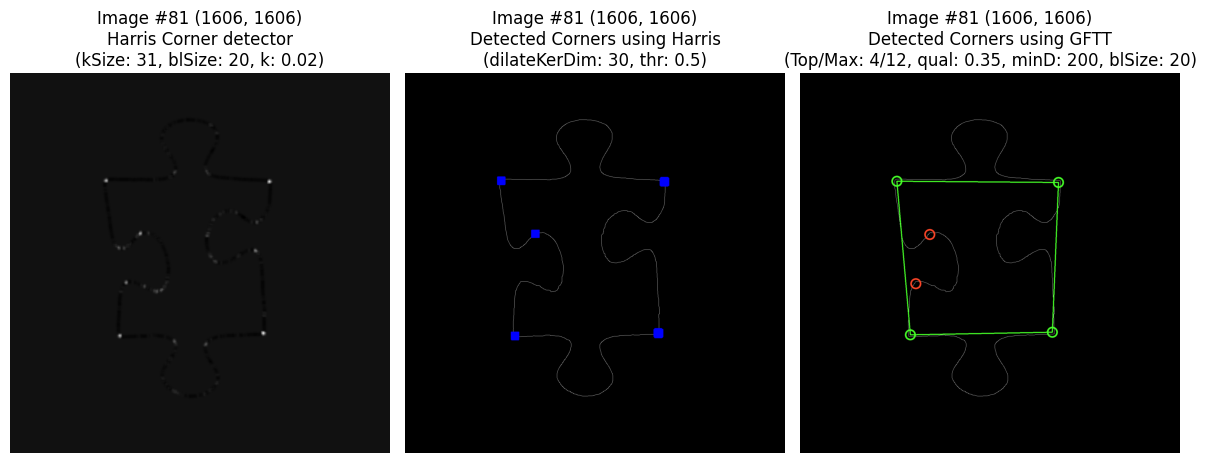

In [11]:
# parameters for Harris Detector
blockSize = 20 # shared with both types of corner detectors
kSize = 31
k = 0.02

thrHarrisCornersViz = 0.5 # 0.5 lucky number for image 020 and 8-31-0.02 for Harris
dimMatrixKernel_Harris = 30
kernel_Harris = cv2.getStructuringElement(cv2.MORPH_RECT, (dimMatrixKernel_Harris, dimMatrixKernel_Harris))

# Parameters for GFTT Detector
cornersMaxQuantity = 12
cornersTopQuantity = 4
cornersQuality = 0.35
cornersMinDist = 200

colCornersGood = [70,255,40]
colCornersBad = [255,70,40]

plt.figure(figsize=(12, 6))


corners_Harris = cv2.cornerHarris(cannyed_image, blockSize, kSize, k)
#result is dilated for marking the corners, not important
corners_Harris_dilated = cv2.dilate(corners_Harris,kernel_Harris)

bgHarrisCorners = cv2.cvtColor(cannyed_image, cv2.COLOR_GRAY2BGR)
# Threshold for an optimal value, it may vary depending on the image.
bgHarrisCorners[ corners_Harris_dilated > thrHarrisCornersViz * corners_Harris_dilated.max() ]=[0,0,255]


# cornered_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cornered_image = cv2.cvtColor(cannyed_image, cv2.COLOR_GRAY2BGR)

corners_GFTT_bad = cv2.goodFeaturesToTrack(cannyed_image, cornersMaxQuantity, cornersQuality, cornersMinDist, blockSize = blockSize)
corners_GFTT_bad = np.intp(corners_GFTT_bad)

corners_GFTT = cv2.goodFeaturesToTrack(cannyed_image, cornersTopQuantity, cornersQuality, cornersMinDist, blockSize=blockSize)
# Sorting corners clockwise starting from the top left
corners_sorted = sortCornersCWTL(corners_GFTT)


# Drawing red circles and lines above all found corners within defined parameters
for i in corners_GFTT_bad:
    x,y = i.ravel()
    cv2.circle(cornered_image,(x,y),circlesRadius,colCornersBad,circlesThickness)

# Drawing green circles and lines above best four corners
for x, y in corners_sorted:
    cv2.circle(cornered_image, (x, y), circlesRadius, colCornersGood, circlesThickness)
for idP in range(4):
    next_id = (idP + 1) % 4
    cv2.line(cornered_image, corners_sorted[idP], corners_sorted[next_id], colCornersGood, lineApproxThickness)


# Showing a greyscaled version of the derivative process executed by Harris. White dots are the sharpest corners
show_image(f"{imageNumberTitle}\nHarris Corner detector\n(kSize: {kSize}, blSize: {blockSize}, k: {k})", corners_Harris, 1, 1, 3)

# Showing dilated Harris corners
show_image(f"{imageNumberTitle}\nDetected Corners using Harris\n(dilateKerDim: {dimMatrixKernel_Harris}, thr: {thrHarrisCornersViz})", bgHarrisCorners, 2, 1, 3)

# Showing corners, best four (4) in green, other best guess in red
show_image(f"{imageNumberTitle}\nDetected Corners using GFTT\n(Top/Max: {cornersTopQuantity}/{cornersMaxQuantity}, qual: {cornersQuality}, minD: {cornersMinDist}, blSize: {blockSize})", cornered_image, 3, 1, 3)

plt.tight_layout()
plt.show()

From now on, we will only rely on GFTT (Shi-Tomasi corner detector) to get our desired corners.

# Checking the validity of the Corner Detection pipeline
We would like to evaluate the **robustness** of the chosen parameters by visually checking all database images for robustness, whether they are good for the whole set of images in the database, or if they were hand-picked to be good just for a small amount of images.
We will show single figures with 4x1 subplots with
- the **original image**,
- the **thresholded binarization**,
- **Canny's edge detection**,
- and final **Corner detection** image **using GFTT**.

All the images will undergo the same process crafted so far, using the same parameters, listed again below.

This part of the code can be executed as stand-alone, without the need of executing all the previous cells.
#todo: copy functions and imports from above




In [12]:

# threshold for binarization
threshold_value = 70 
# kernel for erosion and dilation
dimMatrixKernel = 20
opsIterations = 1
# threshold(s) for Canny
lower_threshold = 40
upper_threshold = 80
# Parameters for GFTT Detector
blockSize = 20
cornersMaxQuantity = 12
cornersTopQuantity = 4
cornersQuality = 0.35
cornersMinDist = 200
# Visualization parameters
circlesRadius = 20
circlesThickness = 5
contoursThickness = 3
lineApproxThickness = 3
erosion_color = [255, 140, 50]
dilation_color = [0, 255, 0]
colCornersGood = [70,255,40]
colCornersBad = [255,70,40]


def execAllImageProcessingSteps(_image,_pieceNumber):
    # thresholding
    _, thresholded_image = cv2.threshold(_image, threshold_value, 255, cv2.THRESH_BINARY_INV)
    # Closing by erosion and dilation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (dimMatrixKernel, dimMatrixKernel))
    eroded_image = cv2.erode(thresholded_image, kernel, iterations=opsIterations)
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=opsIterations)
    # Edge detection using Canny
    cannyed_image = cv2.Canny(dilated_image, lower_threshold, upper_threshold)
    # corner detection using GFTT
    cornered_image = cv2.cvtColor(cannyed_image, cv2.COLOR_GRAY2BGR)
    corners_GFTT_bad = cv2.goodFeaturesToTrack(cannyed_image, cornersMaxQuantity, cornersQuality, cornersMinDist, blockSize = blockSize)
    corners_GFTT_bad = np.intp(corners_GFTT_bad)
    for i in corners_GFTT_bad:
        x,y = i.ravel()
        cv2.circle(cornered_image,(x,y),circlesRadius,colCornersBad,circlesThickness)
    corners_GFTT = cv2.goodFeaturesToTrack(cannyed_image, cornersTopQuantity, cornersQuality, cornersMinDist, blockSize=blockSize)
    corners_sorted = sortCornersCWTL(corners_GFTT)
    # Assuming tuple list
    corners_sorted_forArea = np.array(corners_sorted, dtype=np.int32).reshape((-1, 1, 2))
    goodCornersArea = cv2.contourArea(corners_sorted_forArea)
    goodCornersAreaKilo = round(goodCornersArea / 1000)
    # Disegna cerchi sui corner
    for x, y in corners_sorted:
        cv2.circle(cornered_image, (x, y), circlesRadius, colCornersGood, circlesThickness)
    # Disegna le linee tra i punti in ordine orario
    for idP in range(4):
        next_id = (idP + 1) % 4
        cv2.line(cornered_image, corners_sorted[idP], corners_sorted[next_id], colCornersGood, lineApproxThickness)


    # shows a 4x1 subplots figure, with original, threshold, canny, and GFTT
    imageShape = _image.shape
    imageNumberTitle = f"Image #{_pieceNumber} {imageShape}"
    print(imageNumberTitle)
    plt.figure(figsize=(12, 4))
    show_image(f"{imageNumberTitle}\nOriginal image", _image, 1,1,4)
    show_image(f"{imageNumberTitle}\nThresholded Binarization", thresholded_image, 2,1,4)
    show_image(f"{imageNumberTitle}\nCanny's edge detection", cannyed_image, 3,1,4)
    show_image(f"{imageNumberTitle}\nCorners Detection (area: {goodCornersAreaKilo}k)", cornered_image, 4,1,4)


def showPieceMainParams(_pieceNumber):
    try:
        image = tryLoadingImage(_pieceNumber)
        execAllImageProcessingSteps(image,_pieceNumber)
        # showImageSummary(image)
    except Exception as error:
        print(f"unable to load or process image {_pieceNumber}, because\n{error}")
    

<div style="border-left: 6px solid #f39c12; background-color: #fdf5e6; padding: 1rem; font-size: 1rem;">
  
### ⚠️ Warning: RAM Memory Usage
Please be aware that the part of the code below can show you up to the whole database, loading many GB(s) in RAM.  
Matplotlib throws a warning after the **20th** opened figure that has not been closed, but still lets you open many more.

**RAM Usage Benchmark:** For **30 images** loaded and processed at once: **1.3 GB**
  
</div>


Outside
Entered

Loaded image 066 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece066_crop.jpg
Ordered corners: [(1242, 352), (1177, 965), (592, 954), (551, 373)]
Image #66 (1602, 1602)
Outside
Entered

Loaded image 067 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece067_crop.jpg
Ordered corners: [(1051, 392), (1262, 1129), (760, 972), (521, 508)]
Image #67 (1602, 1602)
Outside
Entered

Loaded image 068 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece068_crop.jpg
Ordered corners: [(866, 432), (1183, 1084), (779, 1256), (683, 907)]
Image #68 (1600, 1600)
Outside
Entered

Loaded image 069 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece069_crop.jpg
Ordered corners: [(536, 454), (1064, 465), (1099, 1083), (503, 1074)]
Image #69 (1602, 1602)
Outside
Entered

Loaded image 070 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece070_crop.jpg
Ordered corners: [(997, 430), (1144, 1087), (543, 1193), (356, 579)]
Image #70 (16

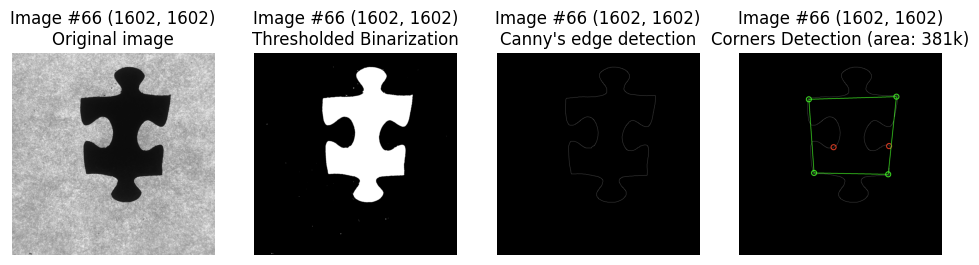

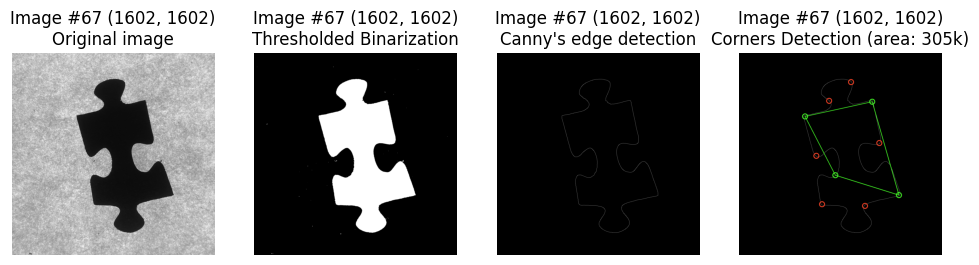

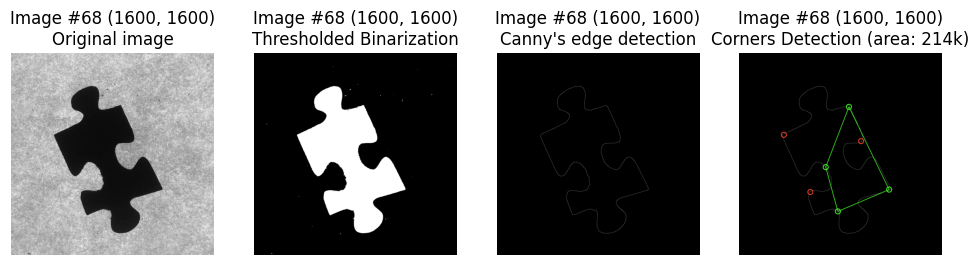

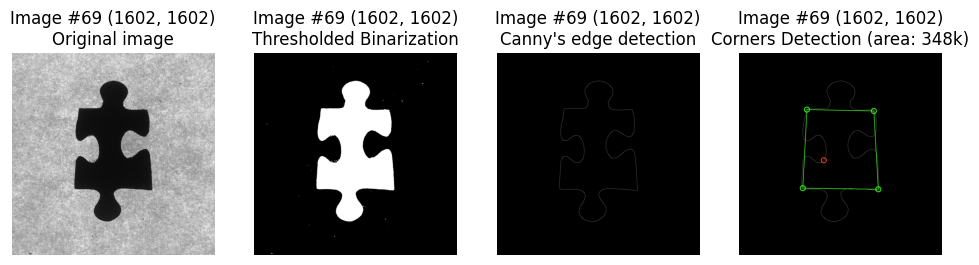

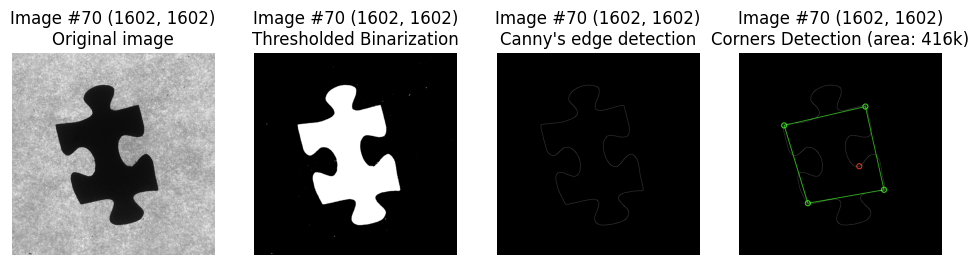

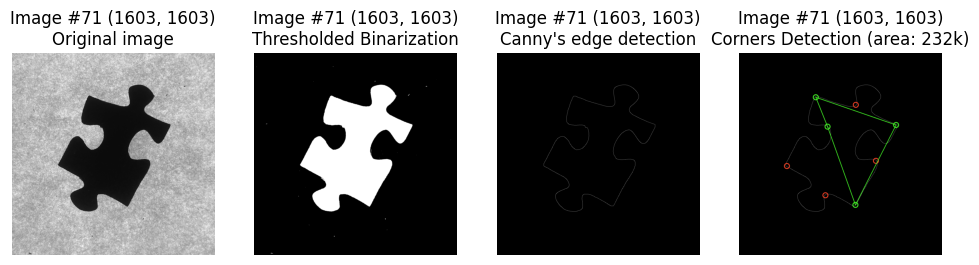

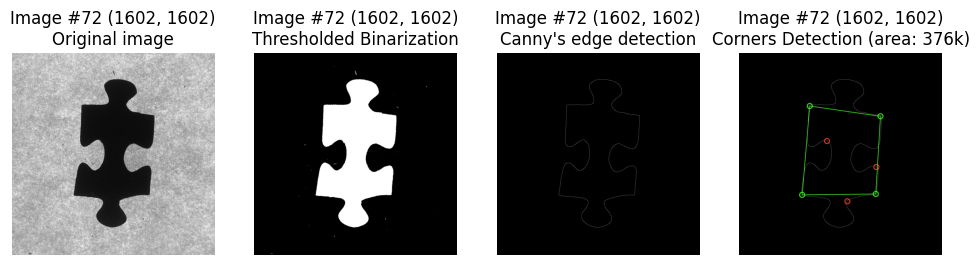

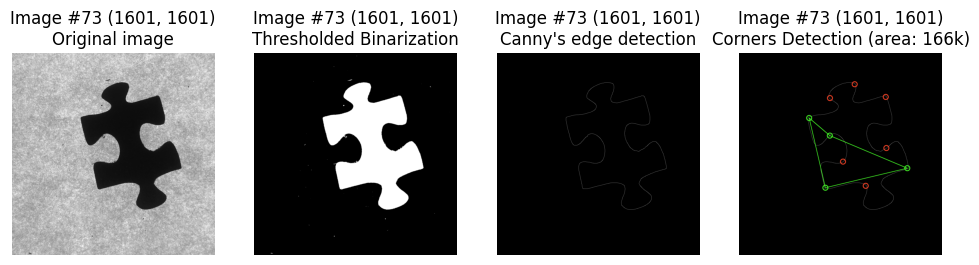

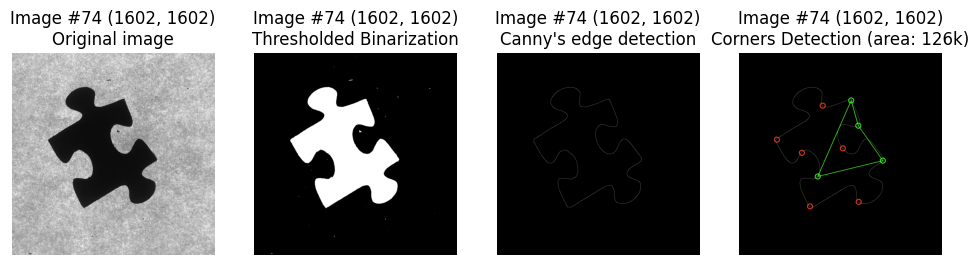

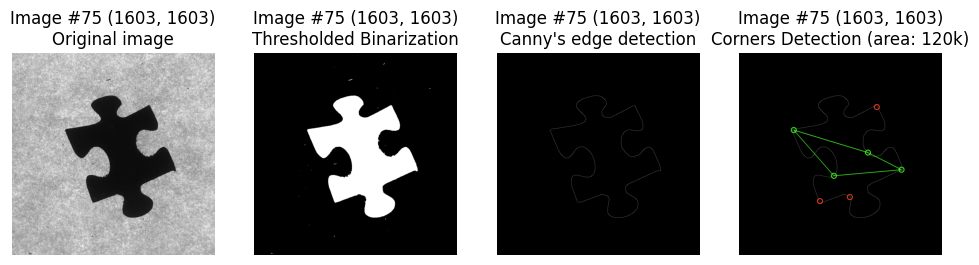

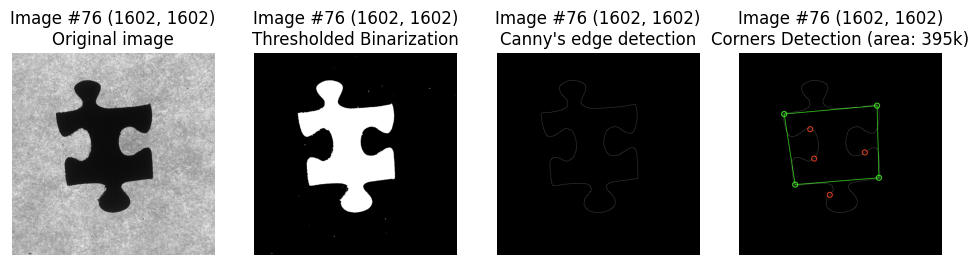

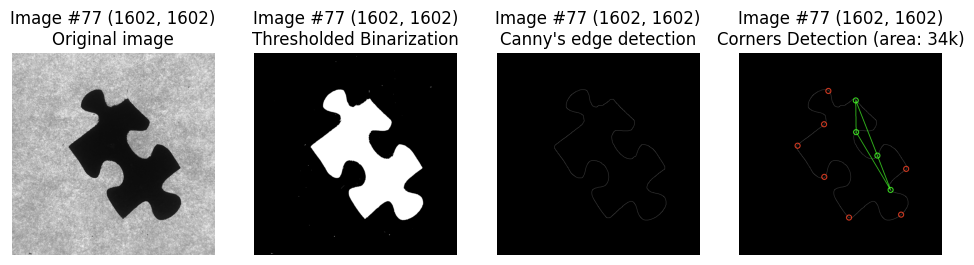

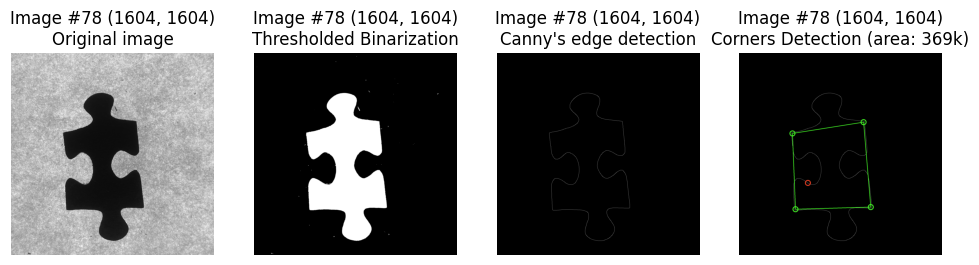

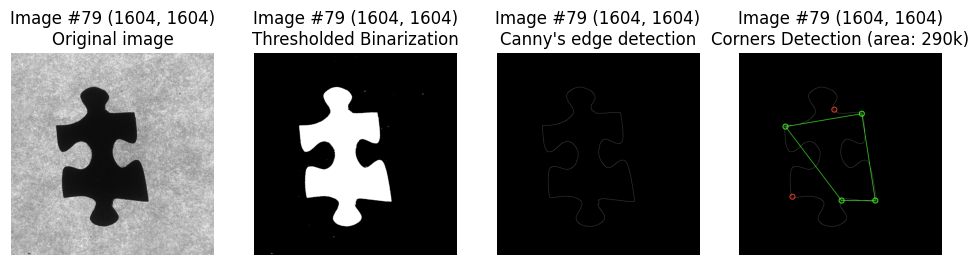

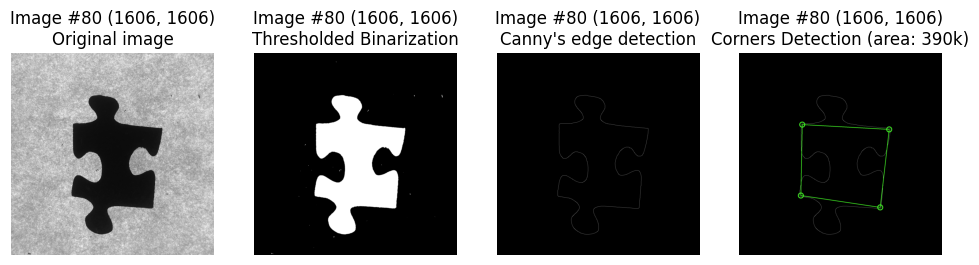

In [13]:
# piece_number = 27
# showPieceMainParams(piece_number)

startingPieceNumber = 66
howManyPieces = 15 # WARNING: PLEASE BE CAREFUL WHEN LOADING TOO MANY IMAGES AT ONCE AS THEY CAN EAT RAM VERY QUICKLY! Keep it below 30-50 for safety

for i in range(startingPieceNumber, startingPieceNumber + howManyPieces):
    showPieceMainParams(i)

## Manually checking for faulty Corners in detection
Some images struggle to get the correct corner(s) detected using the default parameters selected in the previous parts.
Most of the problems arise when sharp corners are detected within other areas of the shape, sometimes due to debris or blobs worsening the overall detection; the actual algorithm is unable to predict and discriminate which corners are the correct ones, and ignores only the corners that are too close together, solving some of the problems but causing others in a few occasions (see piece #68, lower left corner not picked).

**The visual check is performed on the first 126 images** (from "002" to "149" with a few missing) of the database, to get a significant statistical analysis on the issues.

These are:

| Image number | Wrong Corner(s)        | Detected       | 9+ Corners |
|--------------|------------------------|----------------|------------|
| 21           | UR                     | Yes            | No         |
| 25           | UR                     | Yes            | No         |
| 56           | UR                     | Yes            | No         |
| 5     9      | UR                     | Yes            | No         |
|      61      | UL, LR                 | Ye      s      | Ye         |
| 65           | R  LR ULL UR, LR       |       Yes No   | Y          |     
| 67           | LL                     |       YesYes   |            |     
| 68           | UL, LL                 |       No (LL)  |            |     
| 71           | LL                     |  Yes           | No         |
| 73           | UR                     | Yes            | Yes        |
| 74           | UL, LL                 | Yes            | Yes        |
| 75           | UR, LL                 | Yes            | No         |
| 77           | UL, LR, LL             | Yes            | Yes        |
| 79           | LL                     | Yes            | No         |
| 87           | UR                     | Yes            | Yes        |
| 93           | UL                     | Yes            | No         |
| 97           | UL                     | Yes            | No         |
| 100          | UL                     | No (UL)        | No         |
| 103          | UR                     | Yes            | No         |
| 110          | UL                     | Yes            | No         |
| 123          | UR                     | Yes            | No         |
| 128          | UR, UL, LR             | No (UL, LL)    | No         |
| 131          | UR, UL, LR             | No (UL, LL)    | No         |
| 132          | UR, UL, LR             | No (UL, LL)    | No         |
| 133          | UR, UL, LR             | No (UR, UL, LL)| No         |
| 134          | UR, LL, LR             | Yes            | Yes        |
| 135          | UL                     | Yes            | Yes        |
| 140          | UR                     | Yes            | Yes        |
| 141          | UL                     | Yes            | No         |
| 143          | UL                     | Yes            | No         |
| 146          | UR                     | Yes            | No         |
| 149          | UL, UR                 | No (UR)        | Yes        |

#todo: mettere a posto le parti sbagliatissime della tabella corrotta, verso l'inzio

The faulty images seems to be 32 out of 126, meaning around the **25% of them present one or more wrongly detected corner(s)**.

Here are listed all of the 32 flagged images (out of the first 126 in the database), 

Outside
Entered

Loaded image 021 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece021_crop.jpg
Ordered corners: [(1141, 683), (975, 1299), (265, 1065), (852, 890)]
Image #21 (1626, 1626)
Outside
Entered

Loaded image 025 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece025_crop.jpg
Ordered corners: [(1217, 455), (1106, 1179), (525, 1090), (575, 762)]
Image #25 (1626, 1626)
Outside
Entered

Loaded image 056 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece056_crop.jpg
Ordered corners: [(831, 472), (1148, 521), (1074, 1097), (490, 981)]
Image #56 (1600, 1600)
Outside
Entered

Loaded image 059 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece059_crop.jpg
Ordered corners: [(1260, 630), (976, 1227), (395, 901), (1022, 783)]
Image #59 (1601, 1601)
Outside
Entered

Loaded image 061 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece061_crop.jpg
Ordered corners: [(1001, 389), (928, 604), (730, 1292), (674, 805)]
Image #61 (16

C:\Users\Andrea\AppData\Local\Temp\ipykernel_1492\1625394768.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 4))


Ordered corners: [(740, 677), (1022, 861), (899, 1281), (552, 809)]
Image #128 (1612, 1612)
Outside
Entered

Loaded image 131 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece131_crop.jpg
Ordered corners: [(972, 293), (1250, 401), (778, 934), (439, 765)]
Image #131 (1612, 1612)
Outside
Entered

Loaded image 132 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece132_crop.jpg
Ordered corners: [(798, 611), (1171, 855), (913, 1065), (275, 634)]
Image #132 (1610, 1610)
Outside
Entered

Loaded image 133 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece133_crop.jpg
Ordered corners: [(636, 319), (1004, 895), (684, 1122), (527, 609)]
Image #133 (1610, 1610)
Outside
Entered

Loaded image 134 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece134_crop.jpg
Ordered corners: [(709, 630), (1202, 1000), (911, 1224), (474, 1029)]
Image #134 (1613, 1613)
Outside
Entered

Loaded image 135 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece13

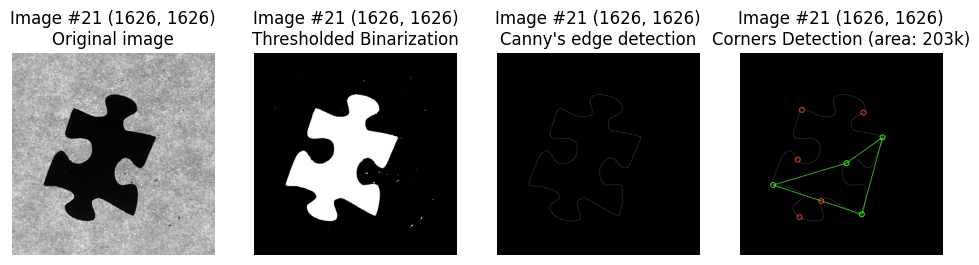

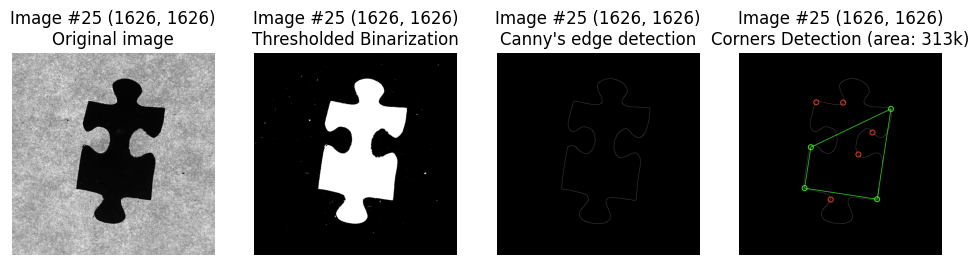

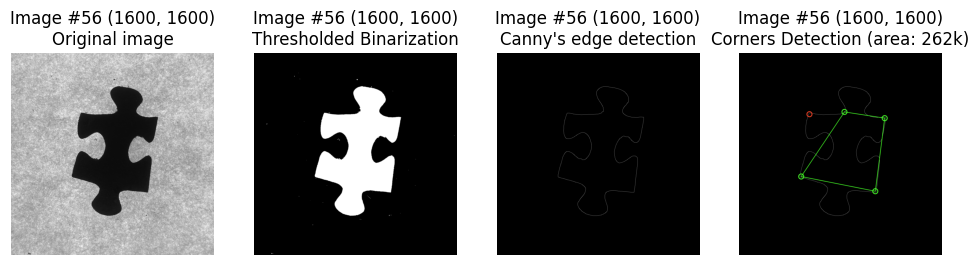

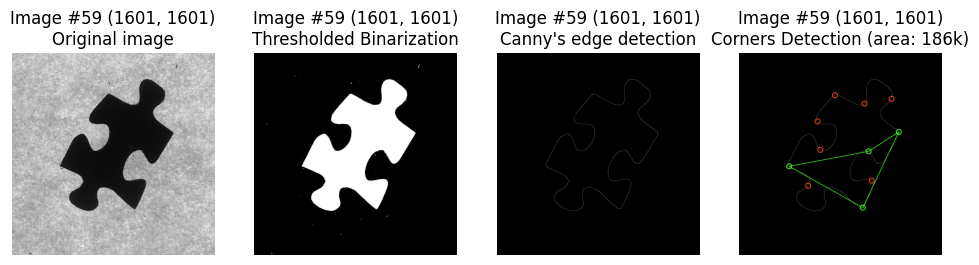

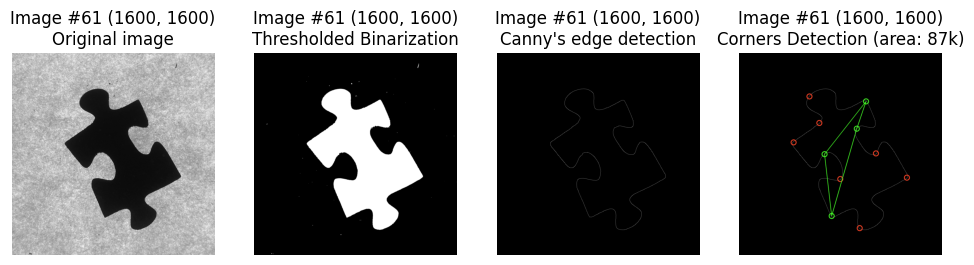

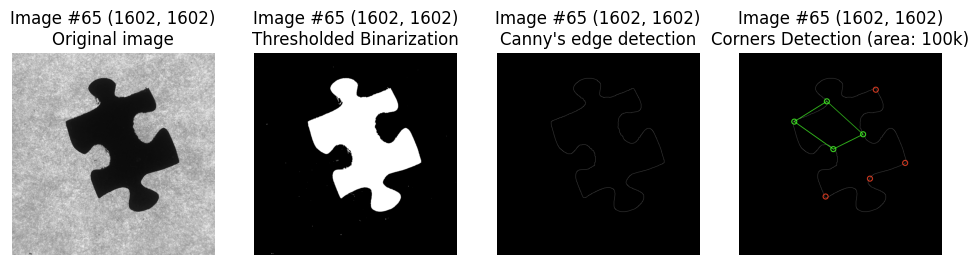

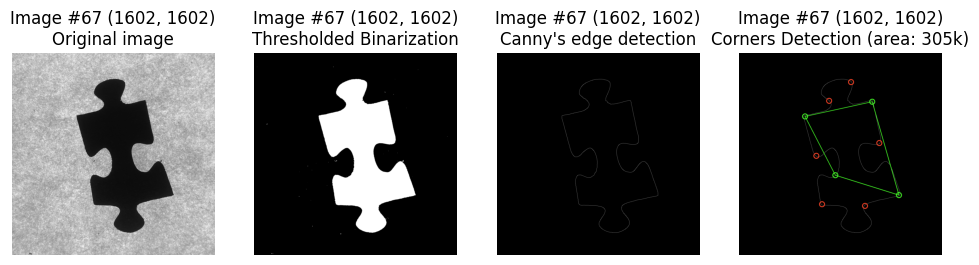

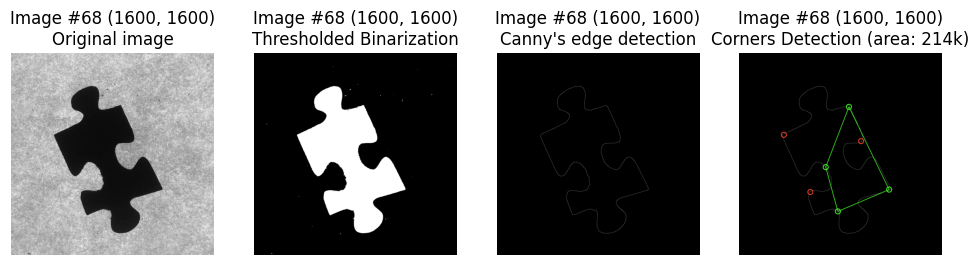

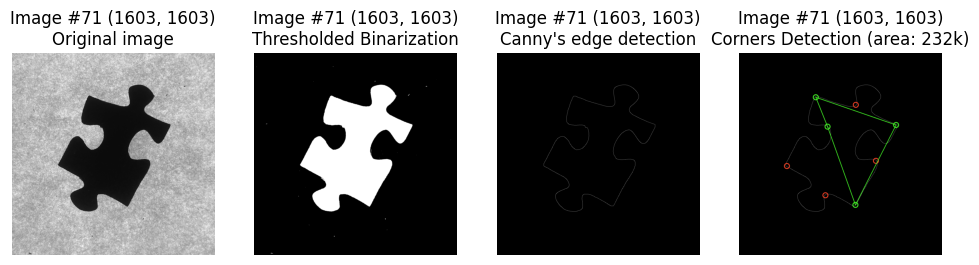

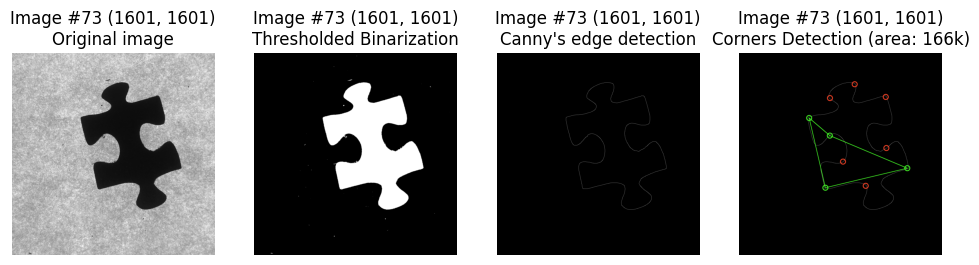

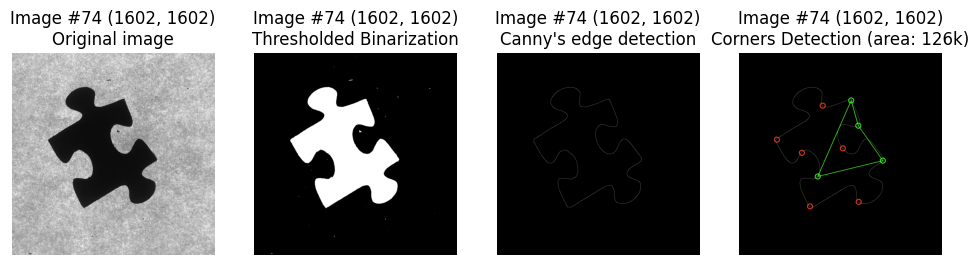

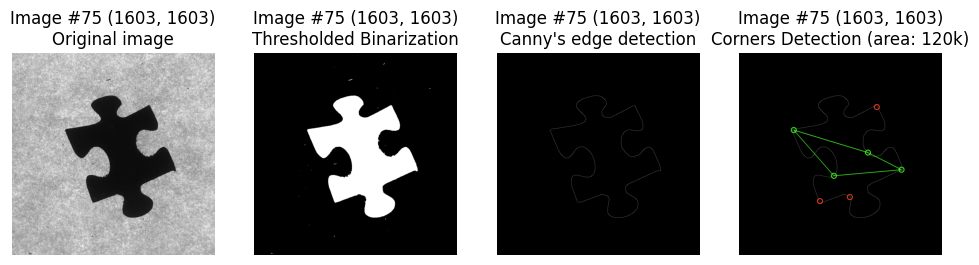

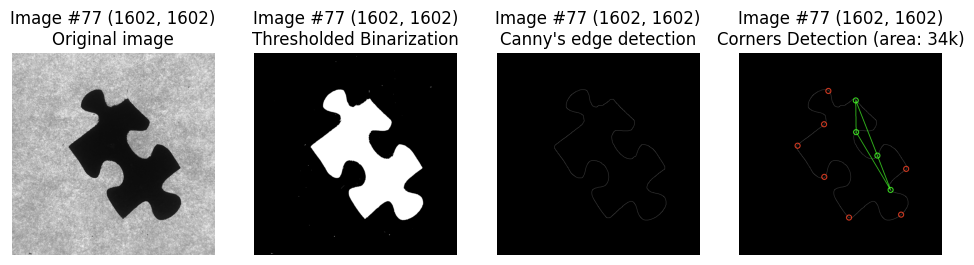

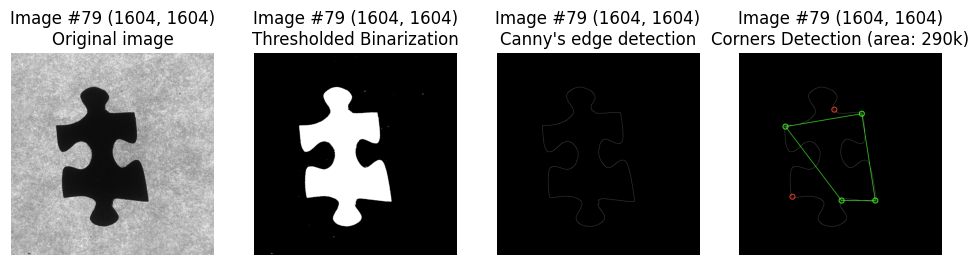

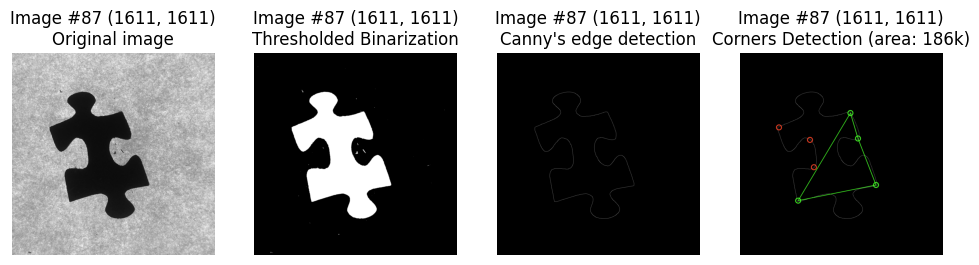

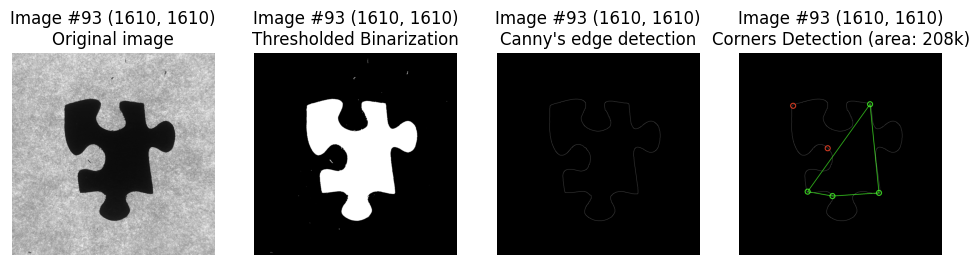

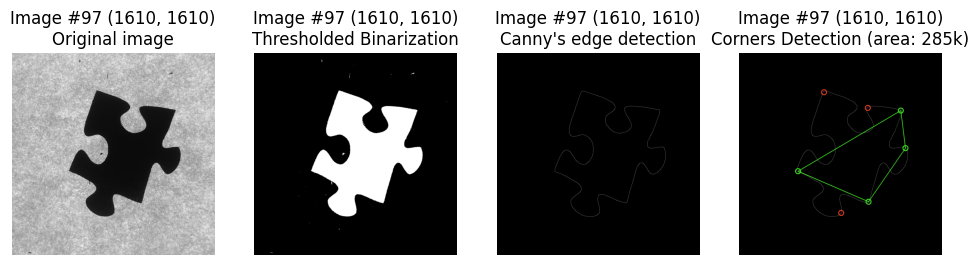

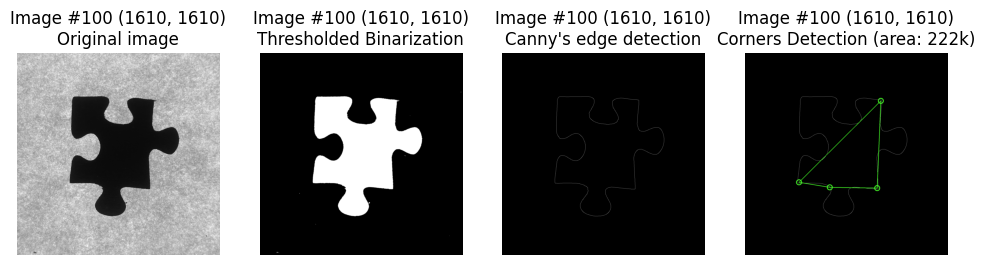

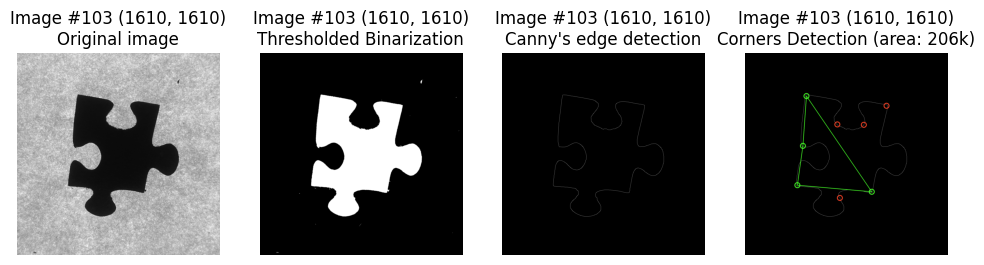

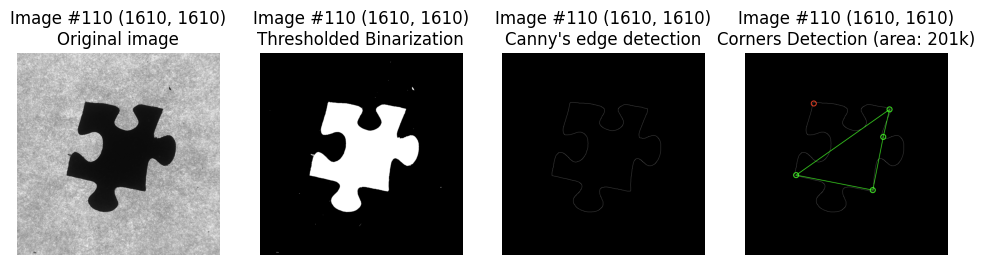

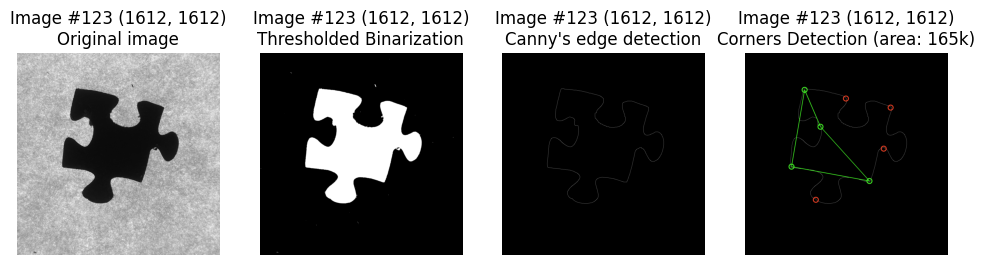

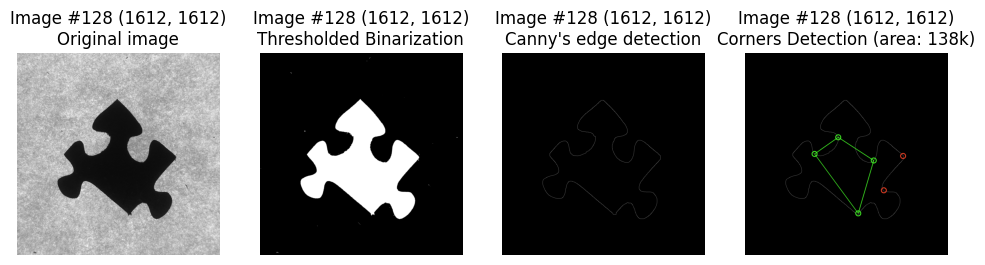

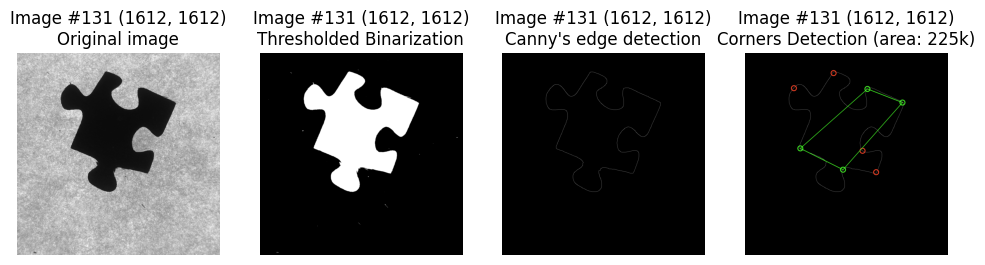

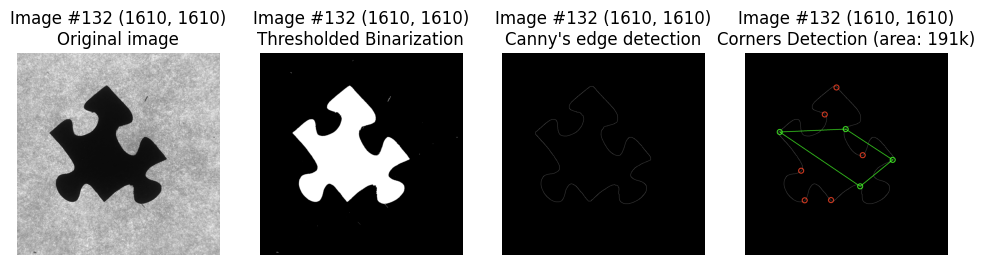

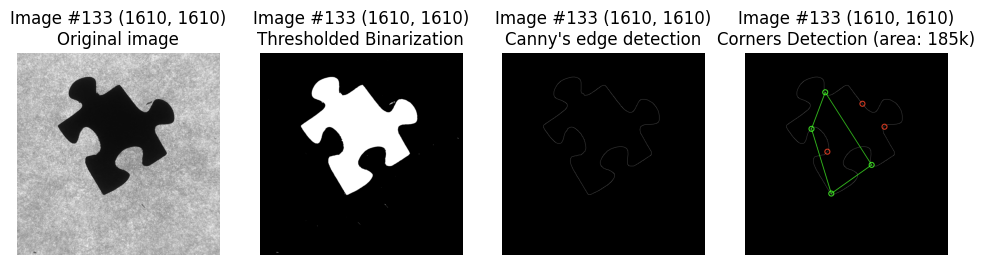

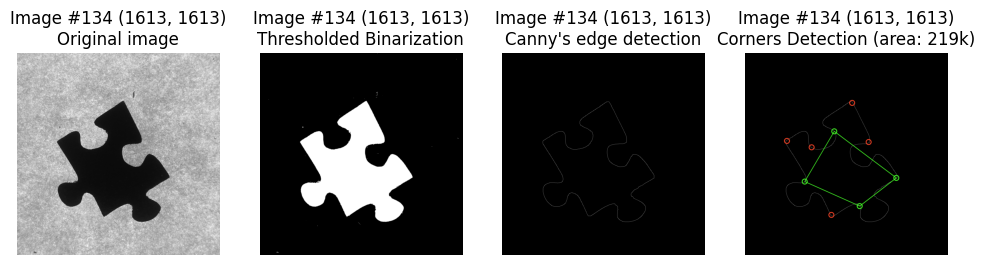

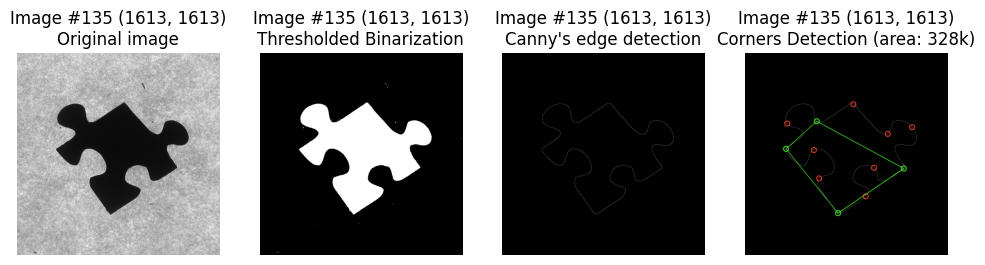

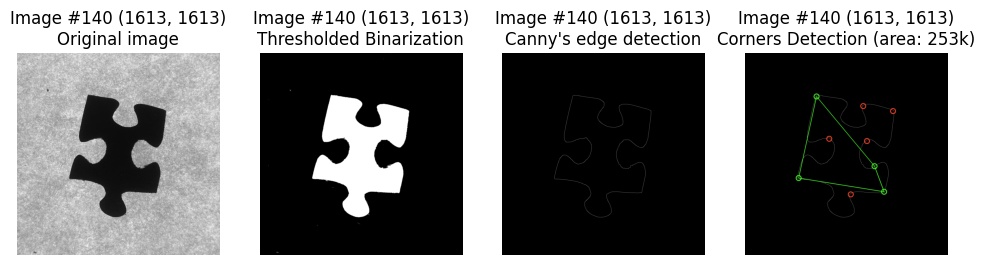

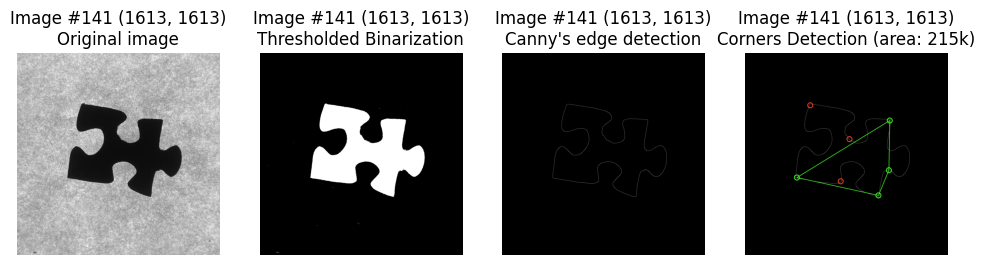

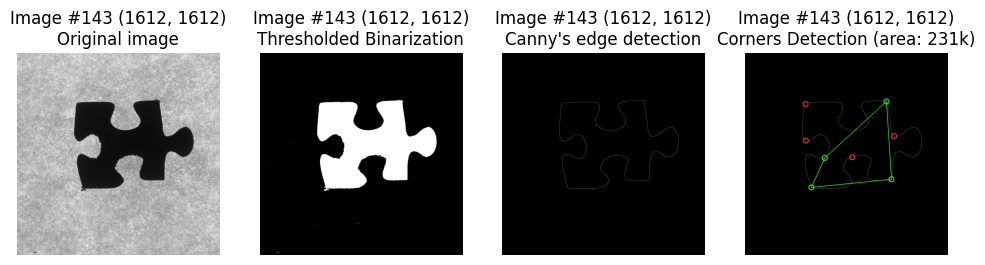

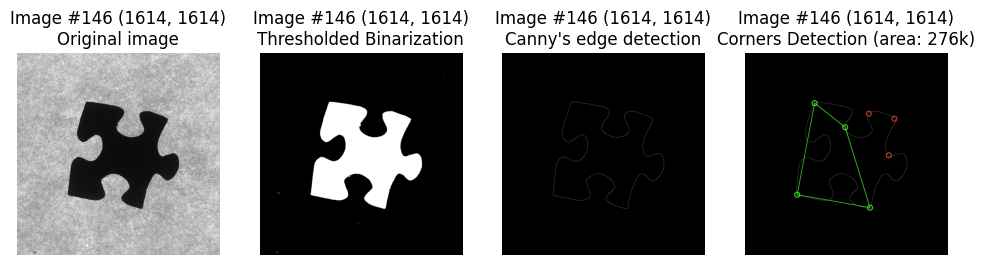

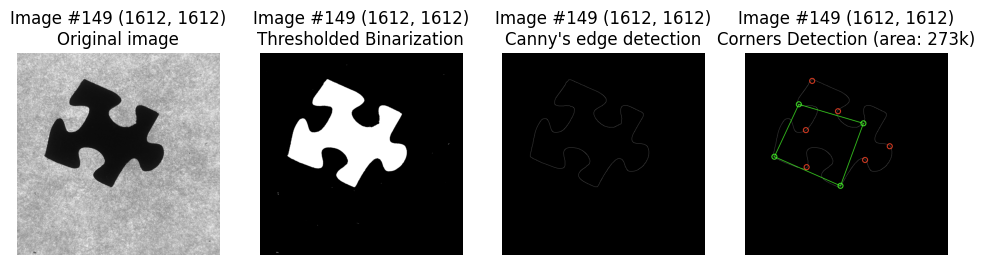

In [14]:
arr_faultyCornersImages_manual = [21,25,56,59,61,65,67,68,71,73,74,75,77,79,87,93,97,100,103,110,123,128,131,132,133,134,135,140,141,143,146,149]
# arr_faultyCornersImages_manual = [23,91] # OTHER TWO FOUND LATER BY THE AUTOMATED FAULT ALGORITHM and missed by me 

# howManyPieces = 3 # WARNING: PLEASE BE CAREFUL WHEN LOADING TOO MANY IMAGES AT ONCE AS THEY CAN EAT RAM VERY QUICKLY
howManyPieces = len(arr_faultyCornersImages_manual) # WARNING: ^

for i in range(howManyPieces):
    showPieceMainParams(arr_faultyCornersImages_manual[i])


## Automatically flagging wrong corners for the whole dataset
The visual inspection pointed out some critical behaviour in the corner detection.
The first approach to solve it (or get rid of it), is to just ignore this faulty cases, and not save in the database the edges that were not recognized.

We would like to automate the process to skip the tedious manual analysis. To identify incorrect shapes, we can use different approaches based on the expected characteristics of the rectangular-like polygon formed by the four corners:
- **Angle Verification**: Check whether each angle is approximately 90° to ensure geometric correctness
- **Area Consistency**: Given that the images are captured under a consistent setup and the pieces are nearly identical in size, we can assume that the areas of the four-corner polygons should fall within a small range, characterized by a low standard deviation. We can perform a statistical analysis to help determine whether the shape is within expected range.

This approach should catch almost all the faults, as some where one or two corners are wrong, will most likely produce a non-rectangular shape, but a few rare others (where up to 3 corners are incorrectly detected) could just by chance produce a rectangular shape that is smaller than expected (see image #065 and #149).

In [15]:
def calculateAreaAndAngles(_image):
    thisPieceAngles = []
    
    # thresholding
    _, thresholded_image = cv2.threshold(_image, threshold_value, 255, cv2.THRESH_BINARY_INV)
    # Closing by erosion and dilation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (dimMatrixKernel, dimMatrixKernel))
    eroded_image = cv2.erode(thresholded_image, kernel, iterations=opsIterations)
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=opsIterations)
    # Edge detection using Canny
    cannyed_image = cv2.Canny(dilated_image, lower_threshold, upper_threshold)
    # corner detection using GFTT
    cornered_image = cv2.cvtColor(cannyed_image, cv2.COLOR_GRAY2BGR)
    corners_GFTT_bad = cv2.goodFeaturesToTrack(cannyed_image, cornersMaxQuantity, cornersQuality, cornersMinDist, blockSize = blockSize)
    corners_GFTT_bad = np.intp(corners_GFTT_bad)
    for i in corners_GFTT_bad:
        x,y = i.ravel()
        cv2.circle(cornered_image,(x,y),circlesRadius,colCornersBad,circlesThickness)
    corners_GFTT = cv2.goodFeaturesToTrack(cannyed_image, cornersTopQuantity, cornersQuality, cornersMinDist, blockSize=blockSize)
    corners_sorted = sortCornersCWTL(corners_GFTT)
    # Assuming tuple list
    corners_sorted_forArea = np.array(corners_sorted, dtype=np.int32).reshape((-1, 1, 2))
    goodCornersArea = cv2.contourArea(corners_sorted_forArea)
    # goodCornersAreaKilo = round(goodCornersArea / 1000)

    
    # Calcolo degli angoli
    for i in range(4):
        # Definizione dei punti per il calcolo dell'angolo
        p1 = corners_sorted[i]
        p2 = corners_sorted[(i + 1) % 4]  # punto centrale
        p3 = corners_sorted[(i + 2) % 4]
        
        # Calcolo dei vettori
        v1 = np.array(p1) - np.array(p2)
        v2 = np.array(p3) - np.array(p2)

        
        # Calcolo del prodotto scalare e delle norme
        dot_product = np.dot(v1, v2)
        norm_v1 = np.linalg.norm(v1)
        norm_v2 = np.linalg.norm(v2)
        
        # Calcolo dell'angolo in radianti e conversione in gradi
        angle_rad = np.arccos(dot_product / (norm_v1 * norm_v2))
        angle_deg = np.degrees(angle_rad)
        
        thisPieceAngles.append(angle_deg)

    return goodCornersArea, thisPieceAngles



In [16]:
%%time
# first batch goes from 2 to 149, the whole database goes from 0 to 414
startingPieceNumber = 0
howManyPieces = 414

arr_piecesAreas = []
arr_piecesAngles = []
arr_piecesNumbers = []
totalLoadedPieces = 0

for pieceN in range(startingPieceNumber, startingPieceNumber + howManyPieces):
    try:
        image = tryLoadingImage(pieceN)
        area, angle = calculateAreaAndAngles(image)
        arr_piecesAreas.append(area)
        arr_piecesAngles.append(angle)
        arr_piecesNumbers.append(pieceN)
        totalLoadedPieces += 1
    except Exception as error:
        print(f"unable to load or process image {pieceN}, because\n{error}")

print(f"\nTotal loaded pieces: {totalLoadedPieces}")

Outside
Entered
unable to load or process image 0, because
cannot access local variable 'image_path' where it is not associated with a value
Outside
Entered
unable to load or process image 1, because
cannot access local variable 'image_path' where it is not associated with a value
Outside
Entered

Loaded image 002 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece002_crop.jpg
Ordered corners: [(1126, 500), (1102, 1183), (541, 1229), (518, 529)]
Outside
Entered

Loaded image 003 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece003_crop.jpg
Ordered corners: [(1167, 499), (1207, 1081), (529, 1144), (475, 569)]
Outside
Entered

Loaded image 004 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece004_crop.jpg
Ordered corners: [(466, 549), (1181, 580), (1182, 1205), (496, 1157)]
Outside
Entered

Loaded image 005 from (relative) path: IPCV_Jiggs_DB/DB_V01/2_cropped/Jigg_piece005_crop.jpg
Ordered corners: [(489, 536), (1159, 587), (1143, 1145), (476, 1172)

KeyboardInterrupt: 

## Plotting statistical results


In [17]:

thresholdArea = 325000       # area in pixels for the four corners polygon
thresholdSingleAngle = 20    # max range of each angle from 90 deg angle in degrees (deg)
thresholdSumAngles = 50      # max sum of (absolute difference of 4 corners from 90 deg) (deg)


In [18]:


def plot_piece_data(arr_piecesAreas, arr_piecesAngles, _firstPieceToViz, _howManyPiecesToViz):

    plot_indices = list(range(_firstPieceToViz, _firstPieceToViz + _howManyPiecesToViz))

    # Clona i dati per preservare gli array originali
    areas_to_plot = np.array(arr_piecesAreas[:len(plot_indices)])
    angles_to_plot = np.array(arr_piecesAngles[:len(plot_indices)])

    # Ordina le aree
    sorted_indices_area = np.argsort(-areas_to_plot)
    sorted_areas = areas_to_plot[sorted_indices_area]

    # Somma delle differenze degli angoli rispetto ai 90°
    angles_diff_sum = np.sum(np.abs(angles_to_plot - 90), axis=1)

    # Ordina le somme delle differenze degli angoli
    sorted_indices_angles = np.argsort(-angles_diff_sum)
    sorted_angles_diff_sum = angles_diff_sum[sorted_indices_angles]

    plt.figure(figsize=(14, 10))

    # 1. Plot originale delle aree (non ordinato)
    plt.subplot(2, 2, 1)
    plt.bar(plot_indices, areas_to_plot, color='skyblue')
    plt.axhline(y=thresholdArea, color='red', linestyle='--', label=f'Threshold Area = {thresholdArea} px²')
    plt.title('Areas (Original Order)')
    plt.xlabel('Piece Index')
    plt.ylabel('Area (pixels)')
    plt.xticks(plot_indices)
    plt.legend()

    # 2. Plot delle aree ordinate (griglia 2x2)
    plt.subplot(2, 2, 2)
    plt.bar(plot_indices, sorted_areas, color='skyblue')
    plt.axhline(y=thresholdArea, color='red', linestyle='--', label=f'Threshold Area = {thresholdArea} px²')
    plt.title('Areas (Sorted)')
    plt.xlabel('Piece Index (Sorted)')
    plt.ylabel('Area (pixels)')
    plt.xticks(plot_indices)
    plt.legend()
    
    # 3. Plot della somma delle differenze angolari
    arr_piecesAngles_np = np.array(angles_to_plot)
    plt.subplot(2, 2, 3)
    # Grafico a linee per i quattro angoli
    for angle_index in range(arr_piecesAngles_np.shape[1]):
        plt.plot(
            plot_indices,
            arr_piecesAngles_np[:len(plot_indices), angle_index],
            marker='o',
            label=f'Angolo {angle_index + 1}'
        )
    plt.axhline(y=90+thresholdSingleAngle, color='red', linestyle='--', label=f'Threshold max angle = {90+thresholdSingleAngle}°')
    plt.axhline(y=90-thresholdSingleAngle, color='red', linestyle='--', label=f'Threshold min angle = {90-thresholdSingleAngle}°')
    plt.title('Angoli dei pezzi')
    plt.xlabel('Numero pezzo')
    plt.ylabel('Angoli (gradi)')
    plt.ylim(90 - thresholdSingleAngle - 15, 90 + thresholdSingleAngle + 15)
    # plt.yscale('log') # not actually what i want, the log should be using the difference from 90 deg, not starting from 0 
    plt.legend()
    plt.grid(True)


    # 4. Plot delle deviazioni angolari ordinate (griglia 2x2)
    plt.subplot(2, 2, 4)
    plt.plot(plot_indices, sorted_angles_diff_sum, marker='o', color='orange', label='Sum of Angle Deviations (Sorted)')
    plt.axhline(y=thresholdSumAngles, color='red', linestyle='--', label=f'Threshold Sum = {thresholdSumAngles}°')
    plt.title('Sum of Angle Deviations (Sorted)')
    plt.xlabel('Piece Index (Sorted)')
    plt.ylabel('Sum of Deviations (degrees)')
    # plt.ylim(0, 70) # not so useful
    # plt.yscale('log') # not so useful 
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()



KeyboardInterrupt



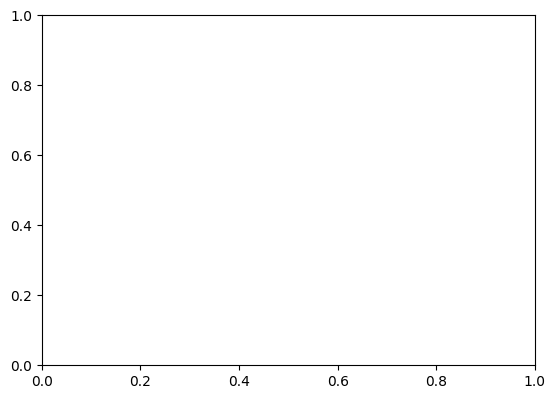

In [19]:
firstPieceToViz = 50
howManyPieceToViz = 414-50

plot_piece_data(arr_piecesAreas, arr_piecesAngles, firstPieceToViz, howManyPieceToViz)


In [ ]:
def getIndexAreaBelowThreshold(_arr_piecesAreasToCheck, _thresholdArea):
    # Trova gli indici dei dati sotto la soglia
    indices_below_threshold = [i for i, area in enumerate(_arr_piecesAreasToCheck) if area < _thresholdArea]
    return indices_below_threshold

def getIndexAglesAboveThreshold(_arr_piecesAnglesToCheck, _thresholdAngle):
    # Trova gli indici dei pezzi con almeno un angolo fuori dal range [90 - threshold, 90 + threshold]
    indices_out_of_range = [
        i for i, angles in enumerate(_arr_piecesAnglesToCheck) 
        if any(abs(angle - 90) > _thresholdAngle for angle in angles)
    ]
    return indices_out_of_range

def getIndexSumAnglesAboveThreshold(_arr_piecesAnglesToCheck, _thresholdSum):
    """
    Trova gli indici dei pezzi in cui la somma delle differenze tra i 4 angoli e 90° 
    supera la soglia specificata.
    """
    indices_out_of_range = [
        i for i, angles in enumerate(_arr_piecesAnglesToCheck) 
        if sum(abs(angle - 90) for angle in angles) > _thresholdSum
    ]
    return indices_out_of_range



def get_piece_numbers(indices, piece_numbers):
    # Restituisce i numeri delle immagini corrispondenti agli indici
    return [piece_numbers[i] for i in indices]

def compute_common_unique_and_total_indices(*arrays):
    # Convert the input arrays into sets
    sets = [set(arr) for arr in arrays]

    # Find indices common to all arrays (intersection)
    common_indices = sorted(set.intersection(*sets))
    # Find indices present in only one of the arrays (unique elements)
    unique_indices = sorted(set.union(*sets) - set(common_indices))
    # Find all indices from all arrays (union)
    total_indices = sorted(set.union(*sets))

    return common_indices, unique_indices, total_indices



In [ ]:

indicesArea = getIndexAreaBelowThreshold(arr_piecesAreas, thresholdArea)
piecesNumberWrongArea = get_piece_numbers(indicesArea, arr_piecesNumbers)
# print(f"Pieces with areas smaller than threshold ({thresholdArea}): {indicesArea}")
print(f"Pieces with areas smaller than threshold ({thresholdArea}) ({len(indicesArea)} in total): {piecesNumberWrongArea}")
percentageWrongArea = round(len(indicesArea) / totalLoadedPieces * 100, 2)
print(f"Percentage of pieces having wrong areas: {percentageWrongArea}%")
print(f"\n")


indicesSingleAngles = getIndexAglesAboveThreshold(arr_piecesAngles, thresholdSingleAngle)
piecesNumberWrongSingleAngles = get_piece_numbers(indicesSingleAngles, arr_piecesNumbers)
# print(f"Pieces having at least one angle out of range ±{thresholdSingleAngle}° from 90° deg: {indicesAngles}")
print(f"Pieces having at least one angle out of range ±{thresholdSingleAngle}° from 90° ({len(indicesSingleAngles)} in total): {piecesNumberWrongSingleAngles}")
print(f"Total pieces having wrong angles: {len(indicesSingleAngles)}")
percentageWrongAngle = round(len(indicesSingleAngles) / totalLoadedPieces * 100, 2)
print(f"Percentage of pieces having wrong sum of angles: {percentageWrongAngle}%")
print(f"\n")

indicesSumAngles = getIndexSumAnglesAboveThreshold(arr_piecesAngles, thresholdSumAngles)
piecesNumberWrongSumAngles = get_piece_numbers(indicesSumAngles, arr_piecesNumbers)
# print(f"Pieces having at least one angle out of range ±{thresholdAngle}° from 90° deg: {indicesAngles}")
print(f"Pieces having sum of absolute differences from 90° angles, above range {thresholdSumAngles}° ({len(indicesSumAngles)} in total): {piecesNumberWrongSumAngles}")
percentageWrongSumAngles = round(len(indicesSumAngles) / totalLoadedPieces * 100, 2)
print(f"Percentage of pieces having wrong sum of angles: {percentageWrongSumAngles}%")
print(f"\n")

# computing unique and common
common_indices, unique_indices, total_indices = compute_common_unique_and_total_indices(indicesArea, indicesSingleAngles, indicesSumAngles)
common_pieces, unique_pieces, arr_faultyCornersImages_auto = compute_common_unique_and_total_indices(piecesNumberWrongArea, piecesNumberWrongSingleAngles, piecesNumberWrongSumAngles)



print(f"Piece common to all arrays (intersection) ({len(common_pieces)} in total): {common_pieces}")
print(f"Pieces present in only one of the arrays (unique elements) ({len(unique_pieces)} in total): {unique_pieces}")
print(f"Pieces from all arrays (union) ({len(arr_faultyCornersImages_auto)} in total): {arr_faultyCornersImages_auto}")


## Checking false positives of automatically detected faulty corners
We will perform a final visual check of the automatically detected faulty images, to check for any false positive.
As the tests are quite strict, we know that pieces that failed all the test are probably wrong, so we are more interested in checking for false positives, or pieces that passed at least one of the tests.

In [ ]:
%%time
flag_showOnlyUnique = True

if( flag_showOnlyUnique ):
    # WARNING: PLEASE BE CAREFUL WHEN LOADING TOO MANY IMAGES AT ONCE AS THEY CAN EAT RAM VERY QUICKLY
    for i in range(len(unique_pieces)):
        showPieceMainParams(unique_pieces[i])
else:
    # WARNING: PLEASE BE CAREFUL WHEN LOADING TOO MANY IMAGES AT ONCE AS THEY CAN EAT RAM VERY QUICKLY
    for i in range(len(arr_faultyCornersImages_auto)):
        showPieceMainParams(arr_faultyCornersImages_auto[i])



In [ ]:
print(f"Total pieces in the database: {totalLoadedPieces}")
print(f"Total detected faulty pieces: {len(arr_faultyCornersImages_auto)}")
percentageWrongPieces = round(len(arr_faultyCornersImages_auto) / totalLoadedPieces * 100, 2)
# print(f"Percentage of faulty pieces in database: {percentageWrongPieces}%")
print(f"Accuracy of the corner detection algorithm: { 100 - percentageWrongPieces}%")

## Corner detection pipeline Robustness assessment
As we can see, even the pieces that failed just one of the test were actually faulty and correctly identified, meaning that the detection algorithm is robust, and we can use the array of the total faulty detected pieces, to prevent them from being used further along the line.

Our database consists of 390 pieces, and we detected 60 faulty pieces, meaning our corner detector implementation has an **accuracy** (calculated using only the piece that have all the four corners marked as correct) of **85%**.
The extimation is optimistic (the opposite of conservative), as we haven't checked for false negatives yet, but those should be close to zero, so the accuracy percentage should remain around 85%.

## Preventing wrong corners from being loaded
As a first approach to deal with the bug in the corners detection, we are going to prevent faulty images from being loaded.

In [ ]:
# setting a flag to prevent images that have wrong corners to be loaded and used in image processing
flag_preventFaultyCornersImageLoad = True

# Splitting the edges
Having a robust corner detection algorithm, we can continue using the correctly detected corners to split the four edges, so that we can then analyze their shape.

First of all we want to separate the edges, to do that we look for the closest points of the contour to each of the corners, and use their indexes to separate the contour shape into four edges contours.

In [ ]:

circlesRadius = 10 
# https://coolors.co/palettes/popular/4%20colors
# https://oklch.com/
# edge_colors = [(123, 104, 238), (255, 105, 180), (32, 178, 170), (255, 165, 0)]  # Vibrant & Unique
# edge_colors = [(75, 0, 130), (240, 128, 128), (46, 139, 87), (218, 165, 32)]     # Deep & Earthy
# edge_colors = [(72, 210, 139), (199, 21, 133), (0, 206, 209), (255, 140, 0)]     # Rich & Contrasting
# edge_colors = [(0, 217, 112), (255, 112, 0), (0, 146, 233), (255, 78, 179)]      # chosen from https://oklch.com/

# 1. Enamelled Dragon (green), 2. Pink Katydid (pink), 3. Jade Glass (teal), 4. Flush Orange (orange)
#               1. (green),     2. (pink),      3. (teal),    4. (orange)
edge_colors = [(72, 210, 139), (255, 78, 179), (0, 206, 209), (255, 112, 0)]

colTextCornersGFTT = (70,255,40)        # green
colTextCornersShape = (255, 255, 255)    # white

fontScaleCorner = 3
textCornersRadialOffset = 50
textFont = cv2.FONT_HERSHEY_SIMPLEX


lineThickness = 25
maxDebugLineDeviation = 300
offsetSeqEdges = 30
kernelCanny = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))


def execAllImageProcessingStepsToEdgesSplit(_image,_pieceNumber, _debugEdgesSwirl = False, _solveGapBugDilate = False):
    _imageShape = _image.shape
    _imageNumberTitle = f"Image #{_pieceNumber} {_imageShape}"

    # thresholding
    _, thresholded_image = cv2.threshold(_image, threshold_value, 255, cv2.THRESH_BINARY_INV)
    # Closing by erosion and dilation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (dimMatrixKernel, dimMatrixKernel))
    eroded_image = cv2.erode(thresholded_image, kernel, iterations=opsIterations)
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=opsIterations)
    # Edge detection using Canny
    cannyed_image = cv2.Canny(dilated_image, lower_threshold, upper_threshold)
    # corner detection using GFTT
    cornered_image = cv2.cvtColor(cannyed_image, cv2.COLOR_GRAY2BGR)
    
    corners_GFTT = cv2.goodFeaturesToTrack(cannyed_image, cornersTopQuantity, cornersQuality, cornersMinDist, blockSize=blockSize)
    corners_sorted = sortCornersCWTL(corners_GFTT)

    
    # Drawing green circles and lines above best four corners
    for x, y in corners_sorted:
        cv2.circle(cornered_image, (x, y), circlesRadius, colCornersGood, circlesThickness)
    for idP in range(4):
        next_id = (idP + 1) % 4
        cv2.line(cornered_image, corners_sorted[idP], corners_sorted[next_id], colCornersGood, lineApproxThickness)

    if _solveGapBugDilate:
        cannyed_image = cv2.dilate(cannyed_image, kernelCanny)
    contours, _ = cv2.findContours(cannyed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
    # contours, _ = cv2.findContours(cannyed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # still no solution in swirly bug
    # contours, _ = cv2.findContours(cannyed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS) # still no solution in swirly bug



    # Disegna i contorni sull'immagine originale
    contoured_image = cv2.cvtColor(cannyed_image, cv2.COLOR_GRAY2BGR)
    
    # Looking for four (4) corners
    print(f"Contour(s) found for {_imageNumberTitle}: {len(contours)}")
    
    for indCon, contour in enumerate(contours):
        # Find indices of the closest contour points to each corner
        arr_closestPointsinContourFromVertices_ind = [] 
        arr_closestPointsinContourFromVertices_pos = []
        
        for corner in corners_sorted:
            _distances = [np.linalg.norm(corner - point[0]) for point in contour]
            closest_index = np.argmin(_distances)
            arr_closestPointsinContourFromVertices_ind.append(closest_index)
            # closest_point = contour[np.argmin(_distances)][0]
            # arr_closestPointsinContourFromVertices_pos.append(closest_point)

        
        # HERE1 debug purpose
        if _debugEdgesSwirl:
            print(arr_closestPointsinContourFromVertices_ind)
        arr_closestPointsinContourFromVertices_ind = sorted(arr_closestPointsinContourFromVertices_ind)
        if _debugEdgesSwirl:
            print(arr_closestPointsinContourFromVertices_ind)
        # Sort indices and corresponding positions based on indices
        # sorted_pairs = sorted(zip(arr_closestPointsinContourFromVertices_ind, arr_closestPointsinContourFromVertices_pos), key=lambda x: x[0])
        # arr_closestPointsinContourFromVertices_ind, arr_closestPointsinContourFromVertices_pos = zip(*sorted_pairs)

        # for i, (indexCornerInShape, position) in enumerate(zip(arr_closestPointsinContourFromVertices_ind, arr_closestPointsinContourFromVertices_pos)):
        for i, indexCornerInShape in enumerate(arr_closestPointsinContourFromVertices_ind):
            # print(contour[arr_closestPointsinContourFromVertices_ind[i]])
            position = contour[arr_closestPointsinContourFromVertices_ind[i]][0]
            if _debugEdgesSwirl:
                print(f"Corner {i}: Closest contour point -> Index: {indexCornerInShape}, Position: {position}")
    
        # Extract the four edges from contour based on the closest indices
        edges = []
        num_points = len(contour)
        for i in range(len(arr_closestPointsinContourFromVertices_ind)):
            start_idx = arr_closestPointsinContourFromVertices_ind[i]
            end_idx = arr_closestPointsinContourFromVertices_ind[(i + 1) % len(arr_closestPointsinContourFromVertices_ind)]

            if start_idx == end_idx:
                print(f"\n\n this shouldnt happen!!  start_idx == end_idx in closest corners edge splitting \n\n")
        
            if start_idx < end_idx:
                edge = contour[start_idx:end_idx + 1]
            else:
                edge = np.vstack((contour[start_idx:], contour[:end_idx + 1]))
            edges.append(edge)

        
        # # Draw the edges with different colors
        # edges_image = cv2.cvtColor(cannyed_image, cv2.COLOR_GRAY2BGR)
        # for edge, color in zip(edges, edge_colors):
        #     cv2.polylines(edges_image, [edge], isClosed=False, color=color, thickness=lineApproxThickness)
        
        # Draw the edges with different colors, each shifted 20 pixels higher than the previous one
        edges_image = cv2.cvtColor(cannyed_image, cv2.COLOR_GRAY2BGR)
        for i, (edge, color) in enumerate(zip(edges, edge_colors)):
            if _debugEdgesSwirl:
                shifted_edge = edge - np.array([i * offsetSeqEdges, i * offsetSeqEdges])  # Shift upward by 20 pixels per edge
                cv2.polylines(edges_image, [shifted_edge], isClosed=False, color=color, thickness=lineApproxThickness)
            else:
                cv2.polylines(edges_image, [edge], isClosed=False, color=color, thickness=lineApproxThickness)


        # Draw green circles on the four GFTT corners
        for i, (x, y) in enumerate(corners_sorted):
            cv2.circle(edges_image, (int(x), int(y)), circlesRadius, colCornersGood, circlesThickness)  # Green
            text = str(i)
            text_size, _ = cv2.getTextSize(text, textFont, fontScaleCorner, 2)
            text_width, text_height = text_size
            text_position = (int(x) - text_width // 2 - textCornersRadialOffset, int(y) + text_height // 2 - textCornersRadialOffset)
            cv2.putText(cornered_image, text, text_position, textFont, fontScaleCorner, colTextCornersGFTT, 2)
            # cv2.putText(edges_image, text, text_position, textFont, fontScaleCorner, colTextCornersGFTT, 2)
            # cv2.putText(edges_image, str(i), (int(x) - textCornersRadialOffset, int(y) + textCornersRadialOffset), cv2.FONT_HERSHEY_SIMPLEX, fontScaleCorner, colTextCornersGFTT, 2)
        
        # Draw orange circles on the corresponding closest contour points
        # for i, (x, y) in enumerate(arr_closestPointsinContourFromVertices_pos):
        for i in range(len(arr_closestPointsinContourFromVertices_ind)):
            x, y = contour[arr_closestPointsinContourFromVertices_ind[i]][0]
            cv2.circle(edges_image, (int(x), int(y)), circlesRadius, colCornersBad, circlesThickness)  # Orange
            text = str(i)
            text_size, _ = cv2.getTextSize(text, textFont, fontScaleCorner, 2)
            text_width, text_height = text_size
            text_position = (int(x) - text_width // 2 + textCornersRadialOffset, int(y) + text_height // 2 + textCornersRadialOffset)
            cv2.putText(edges_image, text, text_position, textFont, fontScaleCorner, colTextCornersShape, 2)
            # cv2.putText(edges_image, str(i), (int(x) + textCornersRadialOffset, int(y) - textCornersRadialOffset), cv2.FONT_HERSHEY_SIMPLEX, fontScaleCorner, colTextCornersShape, 2)


        # Disegna il contour con i pixel colorati dal verde al rosso in sequenza dal primo all'ultimo
        contoured_image = cv2.cvtColor(cannyed_image, cv2.COLOR_GRAY2BGR)
        # num_points = len(contour)
        


        for contour in contours:
            p1, p2 = 0, len(contour) - 1  # Esempio di range di indici da visualizzare
        
            # Assicurati che p1 e p2 siano all'interno della lunghezza del contorno
            p1 = max(0, min(p1, len(contour) - 1))
            p2 = max(0, min(p2, len(contour) - 1))
        
            image_center = np.array([contoured_image.shape[1] // 2, contoured_image.shape[0] // 2])
        
            for i in range(len(contour)):
                if p1 <= i <= p2:
                    # Calcola la frazione relativa tra p1 e p2 per determinare il colore e lo spostamento
                    fraction = (i - p1) / max(1, (p2 - p1))
                    color = (
                        int(255 * fraction),        # Rosso aumenta progressivamente
                        int(255 * (1 - fraction)),  # Verde diminuisce progressivamente
                        0                           # Blu fisso a 0
                    )
        
                    # Calcola la direzione e sposta il punto verso l'esterno rispetto al centro dell'immagine
                    point = contour[i][0]
                    direction = point - image_center
                    if np.linalg.norm(direction) != 0:
                        direction = direction / np.linalg.norm(direction)  # Normalizza la direzione
                    if _debugEdgesSwirl:
                        offset = direction * (fraction * maxDebugLineDeviation)                  # Offset proporzionale 
                    else:
                        offset = 0
                    shifted_point = tuple((point + offset).astype(int))
        
                    # Disegna un cerchio sul punto spostato
                    cv2.circle(contoured_image, shifted_point, circlesRadius, color, circlesThickness)
        
                    # Collega il punto corrente al successivo solo se entrambi sono nel range
                    if i < p2:
                        next_point = contour[i + 1][0]
                        direction_next = next_point - image_center
                        if np.linalg.norm(direction_next) != 0:
                            direction_next = direction_next / np.linalg.norm(direction_next)
                        if _debugEdgesSwirl:
                            offset_next = direction_next * (((i + 1 - p1) / max(1, (p2 - p1))) * maxDebugLineDeviation)
                        else:
                            offset_next = 0
                        shifted_next_point = tuple((next_point + offset_next).astype(int))
        
                        cv2.line(contoured_image, shifted_point, shifted_next_point, color, lineThickness)

        
        # HERE2 debug purpose
        if _debugEdgesSwirl:
            print(f"\nFirst and last points in contour:")
            print(contour[0][0])
            print(contour[-1][0])
            print(f"len contour: {len(contour)}")
            
            # interestingPoint = -600
            # print(f"actual: {interestingPoint}")
            # # placing a circle upon the interesting point to mark it visually and see the evolution of the shape
            # cv2.circle(contoured_image, tuple(contour[interestingPoint][0]), circlesRadius * 4, colTextCornersShape, circlesThickness)


        cv2.circle(contoured_image, tuple(contour[0][0]), circlesRadius * 4, colTextCornersShape, circlesThickness)  # First contour point
        # cv2.circle(edges_image, tuple(contour[-1][0]), circlesRadius * 4, colTextCornersShape, circlesThickness)  # Last contour point

        

        plt.figure(figsize=(14, 6))
        # Show Canny edge detection output
        # show_image(f"{_imageNumberTitle}\nEdge Detection (Canny) (low-up: {lower_threshold}-{upper_threshold})", cannyed_image, 1, 1, 4)
        
        # Showing corners, best four (4) in green, other best guess in red
        show_image(f"{_imageNumberTitle}\nDetected Corners using GFTT)", cornered_image, 1, 1, 3)

        titleContourImage = f"{_imageNumberTitle}\nColored contour wrap (green to red)"
        if _debugEdgesSwirl:
            titleContourImage += f"\npoints trans. outward prop. up to {maxDebugLineDeviation}px"
        show_image(titleContourImage, contoured_image, 2, 1, 3)

        # Show extracted edges with distinct colors
        titleEdgesImage = f"{_imageNumberTitle}\nExtracted Edges"
        if _debugEdgesSwirl:
            titleEdgesImage += f"\nedges translated each by {offsetSeqEdges}px"
        show_image(titleEdgesImage, edges_image, 3, 1, 3)
    
        # HERE3 SAVE IMAGE SWIRL FOR DEBUG
        # cv2.imwrite(f"{imageNumberTitle}_swirl.png", contoured_image)



# def showPieceSplitEdges(_pieceNumber, _debugEdgesSwirl = False, _solveGapBugDilate = False):
#     try:
#         image = tryLoadingImage(_pieceNumber)
#         execAllImageProcessingStepsToEdgesSplit(image, _pieceNumber, _debugEdgesSwirl, _solveGapBugDilate)
#     except Exception as error:
#         print(f"unable to load or process image {_pieceNumber}, because\n{error}")
#         print(Exception)

def showPieceSplitEdges(_pieceNumber, _debugEdgesSwirl = False, _solveGapBugDilate = False):
    image = tryLoadingImage(_pieceNumber)
    execAllImageProcessingStepsToEdgesSplit(image,_pieceNumber, _debugEdgesSwirl, _solveGapBugDilate)
    




In [ ]:
startingPieceNumber = 111
howManyPieces = 6 # WARNING: PLEASE BE CAREFUL WHEN LOADING TOO MANY IMAGES AT ONCE AS THEY CAN EAT RAM VERY QUICKLY! Keep it below 30-50 for safety

for i in range(startingPieceNumber, startingPieceNumber + howManyPieces):
    if( flag_preventFaultyCornersImageLoad and i in arr_faultyCornersImages_auto):
        print(f"\nPiece {i} skipped because faulty!\n")
        continue
    else:
        showPieceSplitEdges(i)

**Please ignore this portion of raw text as it is explained in the next cell**

#todo 
- numerare corners in GFTT image for fun, also togliere mega titolo qua
- controllare pezzi che non vanno bene
    - controllare pezzo 406 e simili che hanno più di un contour rilevato (vengono mostrate più immagini essendo ogni contorno uno step diverso del loop)
        - 183, 280, 406
        - res: ordinare i contour in base all'area e poi mostrare solo il primo (più grande)
    - capire perché questi invece sono sbagliati nonostante abbiano un solo contour,
        - 19, 52, 53, 64, 70, 81, 108, 118, 119, 126, 155, 172 (blu), 197, 204, 210, 214, 230, 233, 240, 246, 251, 260, 263, 269, 275, 276, 283, 285, 292, 299, 305, 333, 342, 345, 366, 367, 399
        - res: forse prende ordine dei corners invece che dei punti più vicini riodinati boh
        - actual res: zio peroni in realtà il problema è molto più grave del previsto: il contour si wrappa su se stesso e quindi i corner più vicini che trovo possono essere del primo o del secondo giro che fa, quindi l'ordine cardinale degli indici va a farsi benedire,, also non sto riuscendo a pensare ad una soluzione semplice e veloce da implementare rippppp forse dovrò omettere anche questi pieces dal database
    - non mi piace dove si trovano corners
        - 121
        - res: mmmmhhhhh nessuna easy, aggiungerle a arr di pieces da skippare direi
    - trovato missed corner fault
        - 348

# Checking the validity of the Edge Splitting pipeline
We would like to evaluate the **robustness** of the edge splitting algorithm by visually checking all database images.
We will show single figures with 3x1 subplots with
- and final **Corner detection** image **using GFTT**.
- **contour line coloured from green to red**, and starting point of the contour line
- **splitted edges** and the corners ordered (sorted in ascending order index in the contour array)

## Manually checking for faulty Edges in splitting
We performed a visual check to confirm the validity of the algorithm, but noticed a few edge cases (pun intended). They faults can be divided into three groups:
- Pieces having more than one contour, causing no big troubles, these are just three (3) pieces (183, 280, 406)
- Pieces having a slightly shifted corner from the one we would like to have, caused by the (insieme di circostanze) of the previous corner detection algorithm moving detected corners towards the center because of the intrinsic blurring performed by the the matrix kernel, united by the said piece having a debris bulge near the corner, making this algorithm choose a wrong point as the nearest to the desired corner. This error is minimal and negligible and appears in just one (1) piece (121)
- the elephant in the room: pieces having edges longer than expected, spanning their lenght within random points, with no evident reason. Upon a close inspectoni and an accurate analysis, we noticed that some retrieved **contours are swirling (or wrapping) upon themselves** more than one time, passing back and forth over the same curve and stopping at random points. This strange behaviour affects over **35 different pieces**, within a database of about 330 pieces, meaning **more than 10% of the pieces are affected**.

As the first two problems can be solved easily, we will only discuss the last one. We will show how the swirly behaviour affects the shape of the curve, rendering it in a diverging pattern from the center, moving each point a bit further away, so that when the curve passes over itself, it will show a bit shifted, to appreciate the complete pattern. Applying the same concept to the split edges, we will show them translated from their actual position, each moved a bit farther so that they do not overlap.

Here are the faulty edges:

In [ ]:
%%time

flag_debugSwirl = True
howManyFaultEdgesToShow = 40 # WARNING: PLEASE BE CAREFUL WHEN LOADING TOO MANY IMAGES AT ONCE AS THEY CAN EAT RAM VERY QUICKLY! Keep it below 30-50 for safety


# arr_faultyEdgesImages_manual = [121, 348]
# arr_faultyEdgesImages_manual = [183,280,406]
arr_faultyEdgesImages_manual = [19, 52, 53, 64, 70, 81, 108, 118, 119, 126, 155, 172, 197, 204, 210, 214, 230, 233, 240, 246, 251, 260, 263, 269, 275, 276, 283, 285, 292, 299, 305, 333, 342, 345, 366, 367, 399]

if flag_debugSwirl:
    print("Debug is active!")
    print(f"len arr fault edges (manually flagged): {len(arr_faultyEdgesImages_manual)}")

howManyFaultEdgesToShow = min(howManyFaultEdgesToShow, len(arr_faultyEdgesImages_manual))

for i in range(howManyFaultEdgesToShow):
# for i in range(len(arr_faultyEdgesImages_manual)):
    if( flag_preventFaultyCornersImageLoad and arr_faultyEdgesImages_manual[i] in arr_faultyCornersImages_auto):
        print(f"\nPiece {i} skipped because faulty!\n")
        continue
    else:
        showPieceSplitEdges(arr_faultyEdgesImages_manual[i], flag_debugSwirl)


In [ ]:
# HERE4 - DEBUG PURPOSE TO SAVE IMAGE, uncomment HERE3 to save selected image swirl
# showPieceSplitEdges(19, True, False)

## Finding the cause of the swirl problem - One pixel gap
As a first approach to deal with the strange behaviour in the edge division, we were going to prevent faulty images from being loaded, as the problem seemed to be a bug within the cv2.findContour function.

Upon further inspection, we noticed that the Cannyed images (edge detection) of the pieces that presented a _swirl_ going back and forth around a point, had a **tiny gap of about one pixel within the curve of the contour**, and this prevented the contour algorithm on deeming theoretical neighbouring pixels as being neighbours. This was hard to notice, as the real dimension of the images is much bigger than their representation within a subplot of a figure in Jupyter Notebook, and also bigger than the screen resolution of the computer used for this project, so the single images had to be saved and zoomed in manually to confirm the suspicion.

Here is an example, taken from image #019, where the region of interested containing the little one-pixel-gap is shown within a green circle.

#todo: add the swirl contour subplot to the figure

In [ ]:
circleRadiusR1 = 65
circleRadiusBug = 45
circleRadiusR2 = 15

pathGapBugImageCanny = os.path.join(baseFolder, "Image19_cannyed_gapBug.png")
# imgBug = cv2.imread(pathGapBugImage, cv2.IMREAD_GRAYSCALE)
imgBugCanny = cv2.imread(pathGapBugImageCanny)
# print(imgBugCanny.shape)

pathGapBugImageSwirl = os.path.join(baseFolder, "Image19_cannyed_swirl.png")
# imgBugSwirl = cv2.imread(pathGapBugImage, cv2.IMREAD_GRAYSCALE)
imgBugSwirl = cv2.imread(pathGapBugImageSwirl)
# print(imgBugSwirl.shape)

plt.figure(figsize=(14, 10))

height, width, _ = imgBugCanny.shape
roiCenter = (715, 1137)
# roiScale_percent = 0.04 
roiScale_pixels =  100

# Calculating ROI dims
# roi_width, roi_height = int(width * roiScale_percent), int(height * roiScale_percent)
roi_width = roi_height = roiScale_pixels

x1 = max(0, roiCenter[0] - roi_width // 2)
y1 = max(0, roiCenter[1] - roi_height // 2)
x2 = min(width, x1 + roi_width)
y2 = min(height, y1 + roi_height)

# ROI extraction
roi = imgBugCanny[y1:y2, x1:x2]


# cv2.circle(imgBugCanny, roiCenter, circleRadiusBug, colCornersGood, circlesThickness)  # First contour point
cv2.circle(imgBugCanny, roiCenter, circleRadiusR1, colCornersGood, circlesThickness)  # First contour point
cv2.circle(imgBugCanny, roiCenter, circleRadiusR2, colCornersBad, 2)  # First contour point

show_image(f"Image 19 - gap bug\nCanny swirl contour full image", imgBugSwirl, 1, 1, 3)
show_image(f"Image 19 - gap bug\nCanny contour full image", imgBugCanny, 2, 1, 3)
show_image(f"Image 19 - gap bug\nCanny contour zoomed in ROI\nROI: {roiCenter}", roi, 3, 1, 3)


## Solving the swirl problem - One pixel gap
Once we isolated the problem, the first step we tried to solve it, was to **dilate the edge contour** of each Canny image, using a very small kernel of size 2x2, and noticed with some rerlief that it **solved the problem** for all the image (except for only one of them having a 5 pixels gaps, needing the size of the kernel to be 3x3). After applying the dilation we checked again the database, endorsing the fact that all the images have their edges' contour split in the right way.

Here are all the faulty images after the correction.

In [ ]:
%%time

flag_debugSwirl = False
flag_solvePixelGapBug = True
howManyFaultEdgesToShow = 40 # WARNING: PLEASE BE CAREFUL WHEN LOADING TOO MANY IMAGES AT ONCE AS THEY CAN EAT RAM VERY QUICKLY! Keep it below 30-50 for safety


arr_faultyEdgesImages_manual = [19, 52, 53, 64, 70, 81, 108, 118, 119, 126, 155, 172, 197, 204, 210, 214, 230, 233, 240, 246, 251, 260, 263, 269, 275, 276, 283, 285, 292, 299, 305, 333, 342, 345, 366, 367, 399]
# arr_faultyEdgesImages_manual = [366]
print(f"len arr fault edges (manually flagged): {len(arr_faultyEdgesImages_manual)}")

howManyFaultEdgesToShow = min(howManyFaultEdgesToShow, len(arr_faultyEdgesImages_manual))

for i in range(howManyFaultEdgesToShow):
    if( flag_preventFaultyCornersImageLoad and arr_faultyEdgesImages_manual[i] in arr_faultyCornersImages_auto):
        print(f"\nPiece {i} skipped because faulty!\n")
        continue
    else:
        showPieceSplitEdges(arr_faultyEdgesImages_manual[i], flag_debugSwirl, flag_solvePixelGapBug)


# Edges  Matching
We can now proceed with the operations related to the matching of edges and pieces, having a database of more than 350 images-pieces, each one composed of four different edges that could (potentially) match any of the other _350*4_ edges.

## Discussing Methods for approximating the shape
The contour (edge) images we aquired so far, are each composed of four edges, meaning four arrays of points where each point is a pair of integers (x,y); from here on, we would like to **develop an algorithm that gives a metric, used to decide which two edges in the database are a probable match**, and which ones are too different.

Some of the algorithms and ways to express these curves that can be used to match similar patterns, comprehend:
- Generalized Hough Transform 
- Fourier Series, separated for (x,t) and (y,t) 
- approximating the edge curves with cv2.approxPolyDP() 
- casting vertical and/or horizontal (or even skewed) rays against each edge, and confronting the height of the intersecting points
- image processing (or computer vision) algorithms such as
    - Scale-invariant feature transform (SIFT)
    - Speeded up robust features (SURF)
- calculating the curve derivatives in 2D at each interval point
- extracting other type of custom features, like
    - fitting ellipses for each bulge (hook) and using inclination and eccentricity as features

## Choosing a Method
The solutions chosen involves using the direct output of the edge(s) calculations, made up of hundreds points, and **calculating the distance of each point of the first edge curve (_E1_) one at a time, to every other point of a second edge curve (_E2_), and saving the distance to the nearest point**; we will perform this operation for every point of E1, and then sum op those calculated distance, getting a metric that could help us compare the similarities of two curves; then we will perform this calculation for every second curve E2, saving for each curve E1 the 10 best matches.

We will then address the performance of this algorithm by checking whether known-matching-edges are actually the best match found, and the time complexity and actual time spent running the algorithm.

## Changing framework (Javascript library _P5JS_)
Once we calculated the best match for each curve _E1_, we would like to **visually check the two matching curves in an interactive manner**, and for that we are going to switch framework, from Jupyter Notebook to Javascript's library [**P5JS**](https://p5js.org/). 

The main benefit is the ease of interacting use, as it is responsive and adaptive to user interaction, particularly in the sense that we could move easily visualize and change matching pairs and move them around to construct the puzzle along the way.

Hereafter the code will be written and executed in JS (using a different IDE, a localhost and a browser to execute the code) and will be available with the rest of the database on GitHub, while here in this Notebook we will show the results of the algorithms.

## Comparing two edges
The best 10 matches of each curve are saved in 